# Introduction

The data that is going to be analyzed in this study was obtained from four different experiments on two different epithelial cell lines, MCF7 and HCC1806, that were isolated from patients with a metastatic adenocarcinoma.

Each cell line was sequenced using two different single cell RNA sequencing techniques called SMARTseq and DROPseq. Our aim is to understand the cells' behaviour under certain environmental conditions.

In particular, we want to predict the different levels of oxygen the cell is under. The oxygen levels we are considering are hypoxia (low) and normoxia (normal). The way we are going to do this is by applying different machine learning methods to our data.

First of all we tried to understand the data in depth and prepared it to be put in different algorithms; this was done by visualizing the data, cleaning it(studying the sparsity of the data and removing missing variables,outliers, and irregularities). 

After we applied different learning methods: supervised and unsupervised. The unsupervised learning will help us find any hidden patterns or intrinsic structures in our data, hence dimensionality reduction if allowed. The supervised learning will allow us to build classifiers that apply different algorithms(SVC, binary trees..) to predict the state of each cell based on the given data.

In [ ]:
#Remember you can use command line mode if installations are needed
#!pip install numpy==1.19.5
#!pip install matplotlib
#!pip install seaborn
#!pip install pandas
#[....] for you to add. Please include here for reference the libraries you will use.
#!pip install keras
#!pip install tensorflow

In [4]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import sys
from sklearn.preprocessing import StandardScaler         
import seaborn as sns
from scipy import stats
%matplotlib inline     
sns.set(color_codes=True)

# Exploratory analysis: MCF7 SmartSeq experiment

In [2]:
Metadata = pd.read_csv('/Users/khawl/Desktop/MCF7_SmartS_MetaData (1).tsv', delimiter="\t",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(Metadata))

Dataframe dimensions: (383, 8)


In [3]:
Metadata.head(10)

,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
Filename,,,,,,,,
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A3,Norm,72,S3,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A4,Norm,72,S4,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A5,Norm,72,S5,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A6,Norm,72,S6,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


**This dataframe shows cells of the MCF7 cell line which was obtained by isolating the cancerous tissue of a metastatic adenocarcinoma patient.**

The data frame is composed by 8 columns and 383 columns.

Let's try and breakdown each of them:

* The first Column contains the filenames under the .bam extension which is used to represent aligned sequences, in our case polyeptid chains defining each cell, each file represents a different cell in the cell line we're studying
* The second column simply points at which cell line our cell is located. 
* The third column represents in which PCR plate the analysis of the cell has been conducted
* The Fourth column pos indicates the position of the cell in the cell line
It is also necessary to keep in mind that not every position in the cell line will be spotted, we will treat of this later in the paper. 
* fifth column represents the condition of the cell during the experience, and by condition we mean the level of oxygen of the cell:a cell can present a low level of oxygen (hypoxia), or a normal level (normoxia). 
* The 6th column represents the time the cell spent in the PCR plate And the rest of the columns contain pretty self explanatory data, they respectively indicate the cell name, preprocessing tag of the cell , and processing comments established during the experiment. 

In [4]:
Unfiltered = pd.read_csv('/Users/khawl/Desktop/MCF7_SmartS_Unfiltered_Data (1).txt', delimiter="\ ",engine='python',index_col=0)

In [5]:
Unfiltered.head(5)
print("Dataframe dimensions:", np.shape(Unfiltered))

Dataframe dimensions: (22934, 383)


In the unfiltered data set each column corresponds to a row in the MetaData file, for example: the first column represents the cell S28 in the plate 1 in postition A10 in hypoxia. 

In a sense the name of the column gives all the information needed, so it could be possible to ignore the MetaData.

Each row represents a gene name expressed with a special ID known as Gene Symbols, which is not perfect because the acronym may not be unique. 

We can determine the number of reads (gene expression) by looking at each cell. The expression rate varies from extremely low to very high, and this will be taken in consideration further in the study. 

In [6]:
print(Unfiltered.dtypes)

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      int64
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      int64
                                                              ...  
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    int64
Length: 383, dtype: object


In the Unfiltered set the data is all numeric

we take a look to some descriptive statistics to understand the data

In [7]:
Unfiltered.describe()

,"""output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"""
count,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,...,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000
mean,40.817651,0.012253,86.442400,1.024636,14.531351,56.213613,75.397183,62.767725,67.396747,2.240734,...,17.362562,42.080230,34.692422,32.735284,21.992718,17.439391,49.242784,61.545609,68.289352,62.851400
std,465.709940,0.207726,1036.572689,6.097362,123.800530,503.599145,430.471519,520.167576,459.689019,25.449630,...,193.153757,256.775704,679.960908,300.291051,153.441647,198.179666,359.337479,540.847355,636.892085,785.670341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,0.000000,5.000000,0.000000,7.000000,23.000000,39.000000,35.000000,38.000000,1.000000,...,9.000000,30.000000,0.000000,17.000000,12.000000,9.000000,27.000000,30.000000,38.000000,33.000000
max,46744.000000,14.000000,82047.000000,289.000000,10582.000000,46856.000000,29534.000000,50972.000000,36236.000000,1707.000000,...,17800.000000,23355.000000,81952.000000,29540.000000,12149.000000,19285.000000,28021.000000,40708.000000,46261.000000,68790.000000


We can see that the standard deviation is ten times greater than the mean, which is pretty strange. So let's plot the data to check for some other abnormalities

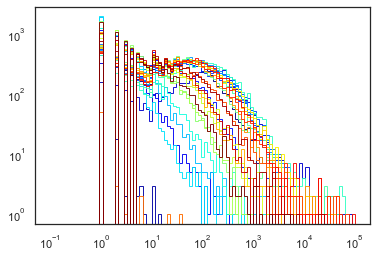

In [8]:
sns.set_style('white')
L=30
colors= dict(zip(np.arange(L),plt.cm.jet(np.linspace(0,1,L))))
for i,col in enumerate(Unfiltered.columns[:L]):
    rand_column = Unfiltered[[f'{col}']].values
    plt.hist(rand_column,bins = np.logspace(-1,5,100),color=colors[i],alpha=.9,histtype='step');
plt.yscale('log')
plt.xscale('log') #taking the log otherwhise the plot doesn't make much sense

We observe that the plot has a power law looking tail, i.e. after the initial peak the distribution of the data decreases almost linearly
The issue seems to be that the data varies largely among the powers of 10, in particular from e-01 to e-5, 
which means it needs to be scaled to reduce the variance. This is probably due to the fact that each cell was sequenced indipendently, so let's plot a part of the gene distribution.

In [9]:
np.logspace(-1, 5, 10)

array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05])

(-200.0, 200.0)

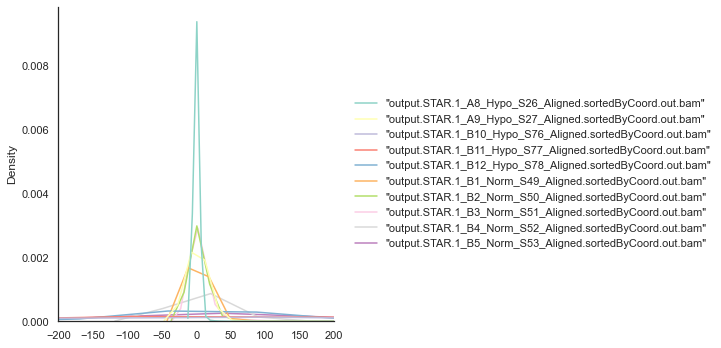

In [10]:
Unfiltered_d = Unfiltered.iloc[:, 10:20] 
sns.displot(data=Unfiltered_d,palette="Set3",kind="kde", bw_adjust=2,)
plt.xlim((-200, 200))

The data is clearly not normalized

Let's check for missing values in the data and remove them

In [11]:
Unfiltered = Unfiltered.dropna()    # Dropping the missing values
Unfiltered.count()
print(Unfiltered.isnull().sum()) 


"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      0
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      0
                                                             ..
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    0
Length: 383, dtype: int64


In [12]:
duplicate_rows = Unfiltered[Unfiltered.duplicated(keep=False)]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (56, 383)


In [13]:
no_dup = Unfiltered.drop_duplicates()
print(no_dup)

             "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     1            
"OR4F29"                                                     0            
"MTND1P23"                                                   0            
...                                                        ...            
"MT-TE"                                                      4            
"MT-CYB"                                                   270            
"MT-TT"                                                      0            
"MT-TP"                                                      5            
"MAFIP"                                                      8            

             "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                

normalizing the data

In [14]:
scaler = sklearn.preprocessing.Normalizer(norm = 'l2')
data = scaler.fit_transform(no_dup)
normalized = pd.DataFrame(data, index=no_dup.index, columns=no_dup.columns)
normalized.describe()

,"""output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"""
count,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,...,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000,22905.000000
mean,0.015699,0.000194,0.029252,0.000655,0.006108,0.021989,0.033873,0.027708,0.031397,0.000862,...,0.006962,0.024186,0.009300,0.014642,0.010084,0.008906,0.025789,0.027056,0.030515,0.026447
std,0.035301,0.009265,0.076544,0.004925,0.015405,0.045285,0.062166,0.044208,0.057950,0.004147,...,0.018406,0.049185,0.050655,0.031425,0.024943,0.034218,0.060821,0.054777,0.058299,0.050000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003697,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.020715,0.000000,0.014194,0.000000,0.008428,0.029870,0.049701,0.045090,0.047749,0.000760,...,0.010534,0.035697,0.000000,0.022630,0.014012,0.010602,0.034847,0.036390,0.045188,0.039059
max,0.895120,0.707107,0.997710,0.408248,0.577350,0.943456,0.942847,0.980581,0.995408,0.500000,...,0.948683,0.999445,0.999504,0.983870,0.925820,0.970143,0.998752,0.916101,0.998274,0.894427


In [15]:
print("Dataframe dimensions:", np.shape(Unfiltered))
print("Dataframe dimensions:", np.shape(normalized))

Dataframe dimensions: (22934, 383)
Dataframe dimensions: (22905, 383)


Let's replot the data to see what has changed

(-0.04, 0.05)

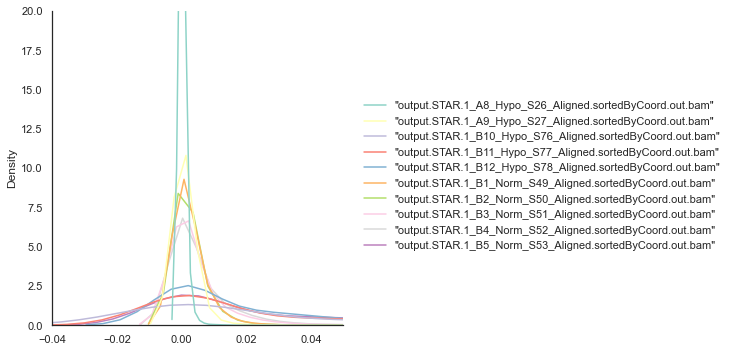

In [16]:
df = normalized.iloc[:, 10:20] 
sns.displot(data=df, palette="Set3",kind="kde", bw_adjust=2)
plt.ylim((0,20))
plt.xlim((-0.04, 0.05))

# HCC1806 dataset

In [17]:
Metadata2 = pd.read_csv('/Users/khawl/Desktop/HCC1806_SmartS_MetaData (2).tsv', delimiter="\t",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(Metadata2))

Dataframe dimensions: (243, 8)


In [18]:
Metadata2.head(10)

,Cell Line,PCR Plate,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
Filename,,,,,,,,
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,HCC1806,1,A10,Normo,24,S123,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,HCC1806,1,A12,Normo,24,S26,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,HCC1806,1,A1,Hypo,24,S97,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,HCC1806,1,A2,Hypo,24,S104,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,HCC1806,1,A3,Hypo,24,S4,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam,HCC1806,1,A4,Hypo,24,S8,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam,HCC1806,1,A5,Hypo,24,S108,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam,HCC1806,1,A6,Hypo,24,S11,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam,HCC1806,1,A7,Normo,24,S113,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


In [19]:
Unfiltered2 = pd.read_csv('/Users/khawl/Desktop/HCC1806_SmartS_Unfiltered_Data.txt', delimiter="\ ",engine='python',index_col=0)

In [20]:
Unfiltered2.head(5)
print("Dataframe dimensions:", np.shape(Unfiltered2))

Dataframe dimensions: (23396, 243)


In [21]:
print(Unfiltered.dtypes)

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      int64
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      int64
                                                              ...  
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    int64
Length: 383, dtype: object


data types are all integers here as well

In [22]:
Unfiltered2.describe()

,"""output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"""
count,23396.000000,23396.000000,23396.000000,23396.000000,23396.000000,23396.000000,23396.000000,23396.000000,23396.000000,23396.000000,...,23396.000000,23396.000000,23396.000000,23396.000000,23396.000000,23396.000000,23396.000000,23396.000000,23396.000000,23396.000000
mean,99.565695,207.678278,9.694734,150.689007,35.700504,47.088434,152.799453,135.869422,38.363908,45.512139,...,76.361771,105.566593,54.026116,29.763806,28.905411,104.740725,35.181569,108.197940,37.279962,76.303855
std,529.532443,981.107905,65.546050,976.936548,205.885369,545.367706,864.974182,870.729740,265.062493,366.704721,...,346.659348,536.881574,344.068304,186.721266,135.474736,444.773045,170.872090,589.082268,181.398951,369.090274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,51.000000,125.000000,5.000000,40.000000,22.000000,17.000000,81.000000,76.000000,22.000000,18.000000,...,56.000000,67.000000,29.000000,18.000000,19.000000,76.000000,24.000000,68.000000,22.000000,44.000000
max,35477.000000,69068.000000,6351.000000,70206.000000,17326.000000,47442.000000,43081.000000,62813.000000,30240.000000,35450.000000,...,19629.000000,30987.000000,21894.000000,13457.000000,11488.000000,33462.000000,15403.000000,34478.000000,10921.000000,28532.000000


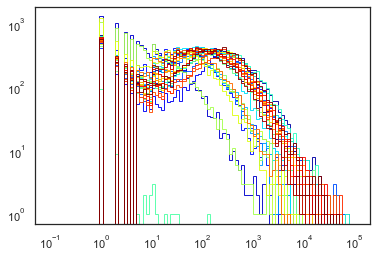

In [23]:
sns.set_style('white')
L=30
colors= dict(zip(np.arange(L),plt.cm.jet(np.linspace(0,1,L))))
for i,col in enumerate(Unfiltered2.columns[:L]):
    rand_column = Unfiltered2[[f'{col}']].values
    plt.hist(rand_column,bins = np.logspace(-1,5,100),color=colors[i],alpha=.9,histtype='step');
plt.yscale('log')
plt.xscale('log')

In [24]:
np.logspace(-1, 10, 10)

array([1.00000000e-01, 1.66810054e+00, 2.78255940e+01, 4.64158883e+02,
       7.74263683e+03, 1.29154967e+05, 2.15443469e+06, 3.59381366e+07,
       5.99484250e+08, 1.00000000e+10])

data is obviously not scaled

(-100.0, 100.0)

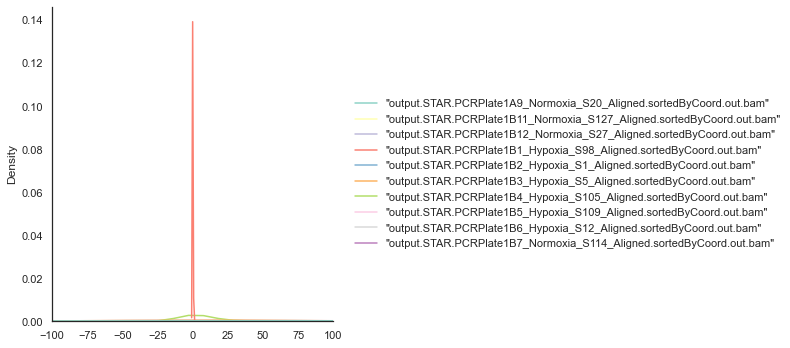

In [25]:
Unfiltered_d = Unfiltered2.iloc[:, 10:20] 
sns.displot(data=Unfiltered_d,palette="Set3",kind="kde", bw_adjust=2,)
plt.xlim((-100, 100))

checking for and dropping missing values

In [26]:
Unfiltered2 = Unfiltered2.dropna()    # Dropping the missing values
Unfiltered2.count()
print(Unfiltered2.isnull().sum()) 

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"    0
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     0
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"       0
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"      0
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"        0
                                                                         ..
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"    0
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"    0
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"      0
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"     0
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"     0
Length: 243, dtype: int64


checking for duplicates

In [27]:
duplicate_rows = Unfiltered2[Unfiltered2.duplicated(keep=False)]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (89, 243)


In [28]:
no_dup2 = Unfiltered2.drop_duplicates()
print(no_dup2)

            "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                        
"CICP27"                                                    0                        
"DDX11L17"                                                  0                        
"WASH9P"                                                    0                        
"OR4F29"                                                    2                        
...                                                       ...                        
"MT-TE"                                                    22                        
"MT-CYB"                                                 4208                        
"MT-TT"                                                    26                        
"MT-TP"                                                    66                        
"MAFIP"                                               

In [29]:
print("Dataframe dimensions:", np.shape(no_dup2))

Dataframe dimensions: (23342, 243)


normalizing the data

In [30]:
scaler = sklearn.preprocessing.Normalizer(norm = 'l2')
data2 = scaler.fit_transform(no_dup2)
normalized2 = pd.DataFrame(data2, index=no_dup2.index, columns=no_dup2.columns)
normalized2.describe()

,"""output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"""
count,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,...,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000,23342.000000
mean,0.028811,0.059438,0.003032,0.041011,0.011419,0.014784,0.042798,0.036697,0.011311,0.013157,...,0.026834,0.030733,0.015302,0.008145,0.008905,0.034486,0.012413,0.032004,0.010633,0.023198
std,0.052640,0.090956,0.012294,0.092303,0.028779,0.047044,0.085017,0.064369,0.027557,0.036316,...,0.049539,0.053567,0.036036,0.019769,0.022101,0.053834,0.029976,0.058000,0.026431,0.040507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001206,0.000000,0.000000,0.000000,0.000000,0.011721,0.000000,0.000000,0.000000,0.004122
75%,0.044732,0.103385,0.003598,0.043911,0.015600,0.012405,0.064344,0.055429,0.015729,0.014235,...,0.041723,0.051216,0.021920,0.012775,0.013619,0.056677,0.017652,0.050952,0.017027,0.037929
max,0.991228,0.980581,0.707107,0.999877,0.999133,0.998053,0.999115,0.976003,0.990992,0.993884,...,0.997459,0.983078,0.948683,0.894427,0.993884,0.986394,0.991837,0.987829,0.980196,0.998524


In [31]:
print("Dataframe dimensions:", np.shape(Unfiltered2))
print("Dataframe dimensions:", np.shape(normalized2))

Dataframe dimensions: (23396, 243)
Dataframe dimensions: (23342, 243)


(-0.08, 0.08)

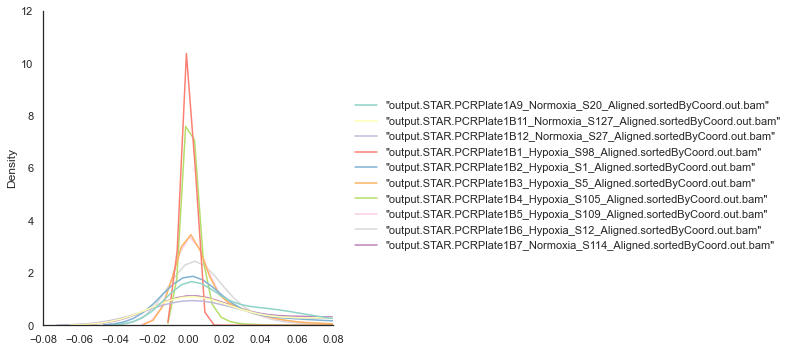

In [32]:
df2 = normalized2.iloc[:, 10:20] 
sns.displot(data=df2, palette="Set3",kind="kde", bw_adjust=2)
plt.ylim((0,12))
plt.xlim((-0.08, 0.08))

# Visualize the outliers

In [33]:
df = pd.read_csv("/Users/khawl/Desktop/MCF7_SmartS_Unfiltered_Data (1).txt",delimiter="\ ",engine='python',index_col=0)
col=df.columns
df

,"""output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"""
"""WASH7P""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
"""MIR6859-1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""WASH9P""",1,0,0,0,0,1,10,1,0,0,...,1,1,0,0,0,0,1,1,4,5
"""OR4F29""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"""MTND1P23""",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""MT-TE""",4,0,0,0,3,3,0,0,14,1,...,0,4,12,4,0,1,6,0,7,4
"""MT-CYB""",270,1,76,66,727,2717,9326,3253,7949,30,...,239,3795,12761,2263,1368,570,3477,349,2184,1149
"""MT-TT""",0,0,0,0,0,1,1,1,4,0,...,0,7,4,2,0,0,3,0,2,2
"""MT-TP""",5,0,0,1,0,1,1,4,2,0,...,0,14,56,11,2,0,7,2,28,11


<function matplotlib.pyplot.show(close=None, block=None)>

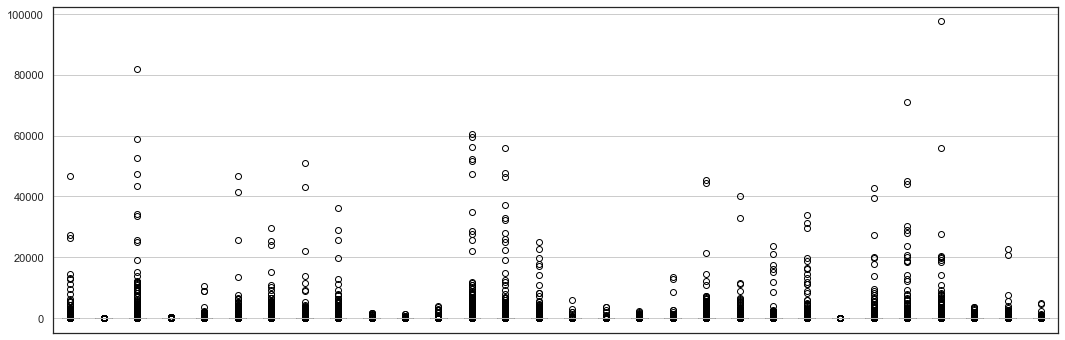

In [34]:
plt.figure(figsize=(18,6))
df_vis=df.iloc[:,:30]
ax=df_vis.boxplot()
ax.axes.xaxis.set_visible(False)
plt.show

In [35]:
def plotvar(df,variable):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(df[variable])
    plt.subplot(1,2,2)
    plt.boxplot(df[variable])
    plt.show()

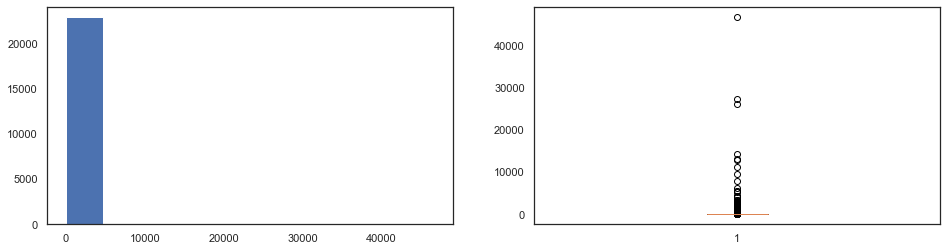

In [36]:
plotvar(df,	'"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"')

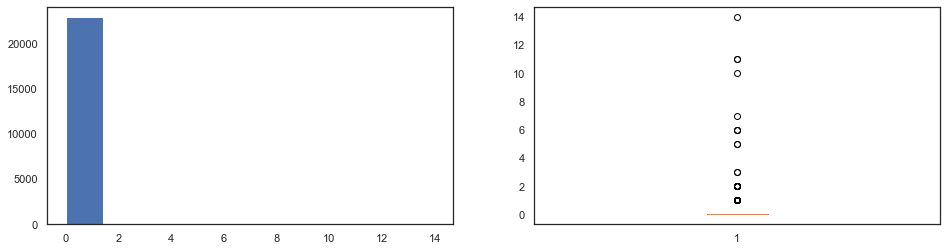

In [37]:
plotvar(df,'"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"')

# Using interquantile-range to remove outliers

We label a point as an outlier if it satisfies one of the following conditions :

* It’s greater than 75th percentile + 1.5 IQR
* It’s less than 25th percentile – 1.5 IQR

We can easily detect the outliers of our distribution. Boxplot uses the same method to plot the outliers as points outside the whiskers.

In [38]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    17.0
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"     0.0
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"     5.0
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"       0.0
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"       7.0
                                                              ... 
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"     9.0
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    27.0
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    30.0
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    38.0
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    33.0
Length: 383, dtype: float64


In [39]:
print("Old data set shape with Outliers ", df.shape)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("New data set shape without Outliers ", df_out.shape)

Old data set shape with Outliers  (22934, 383)
New data set shape without Outliers  (6435, 383)


In [40]:
df_out

,"""output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"""
"""MIR6859-1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""CICP3""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""FAM87B""",0,0,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0
"""MIR429""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""TTLL10""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""MIR6815""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""DIP2A-IT1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""MT-TF""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""MT-TS1""",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

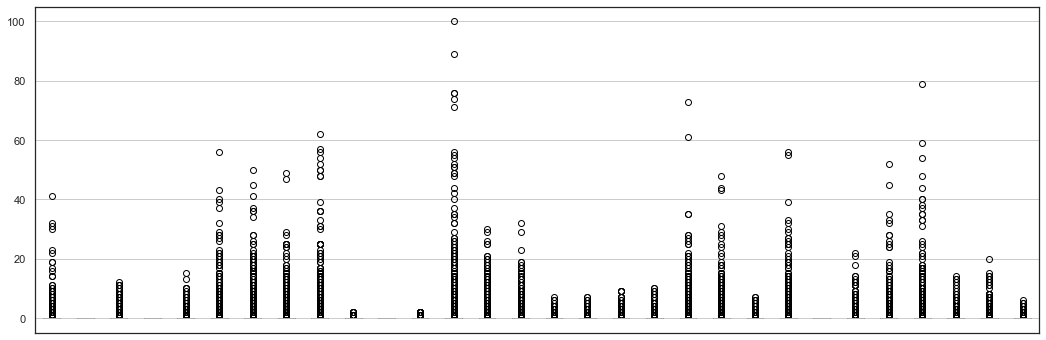

In [41]:
plt.figure(figsize=(18,6))
df_vis_out=df_out.iloc[:,:30]
ax=df_vis_out.boxplot()
ax.axes.xaxis.set_visible(False)
plt.show

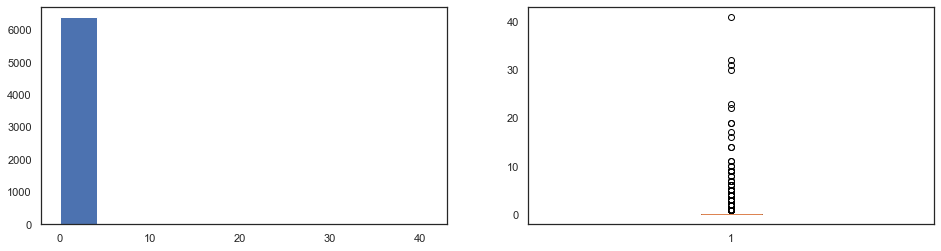

In [42]:
plotvar(df_out,	'"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"')

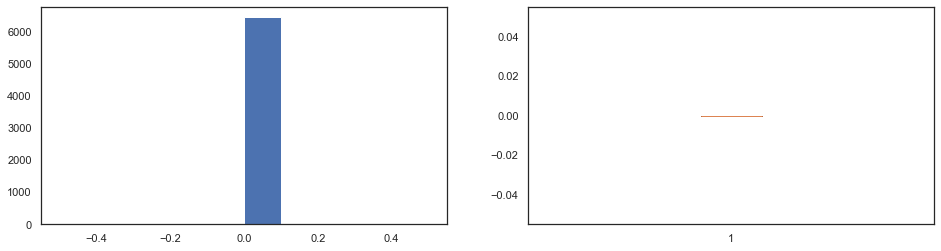

In [43]:
plotvar(df_out,'"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"')

# Using z-scores to remove outliers

Z-scores can quantify the unusualness of an observation when your data follow the normal distribution. Z-scores are the number of standard deviations above and below the mean that each value falls. For example, a Z-score of 2 indicates that an observation is two standard deviations above the average while a Z-score of -2 signifies it is two standard deviations below the mean. A Z-score of zero represents a value that equals the mean.

To calculate the Z-score for an observation, take the raw measurement, subtract the mean, and divide by the standard deviation.

The further away an observation’s Z-score is from zero, the more unusual it is. A standard cut-off value for finding outliers are Z-scores of +/-3 or further from zero. Z-scores beyond +/- 3 are so extreme you can barely see the shading under the curve.

In [44]:
df_norm= pd.read_csv("/Users/khawl/Desktop/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
df_norm

,"""output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam""","""output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam""","""output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam""","""output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam""","""output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam""","""output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam""","""output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam""","""output.STAR.2_C11_Hypo_S131_Aligned.sortedByCoord.out.bam""","""output.STAR.2_C1_Norm_S103_Aligned.sortedByCoord.out.bam""","""output.STAR.2_C2_Norm_S104_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.4_H10_Hypo_S382_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"""
"""CYP1B1""",343,131,452,27,5817,3841,9263,21543,1013,53,...,7890,4512,160,351,327,196,504,34565,20024,5953
"""CYP1B1-AS1""",140,59,203,7,2669,1565,3866,9113,459,22,...,3647,2035,75,138,130,102,238,13717,7835,2367
"""CYP1A1""",0,0,0,0,0,79,238,443,0,0,...,86,1654,0,0,0,1,0,11274,563,522
"""NDRG1""",0,1,0,0,654,1263,2634,540,0,13,...,481,1052,0,0,54,243,62,1263,925,1572
"""DDIT4""",386,289,0,288,2484,2596,1323,2044,36,204,...,3692,2410,800,1,189,266,417,4256,12733,2275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""GRIK5""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""SLC25A27""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""DENND5A""",51,34,0,4,60,107,74,127,0,66,...,179,97,0,35,56,45,0,140,7,37
"""CDK5R1""",0,0,0,0,0,0,0,0,0,8,...,0,0,26,0,0,19,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

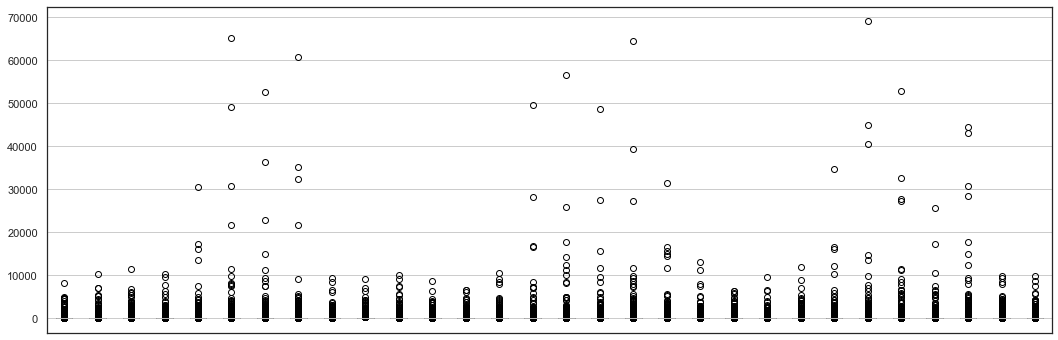

In [45]:
plt.figure(figsize=(18,6))
df_vis_norm=df_norm.iloc[:,:30]
ax=df_vis_norm.boxplot()
ax.axes.xaxis.set_visible(False)
plt.show

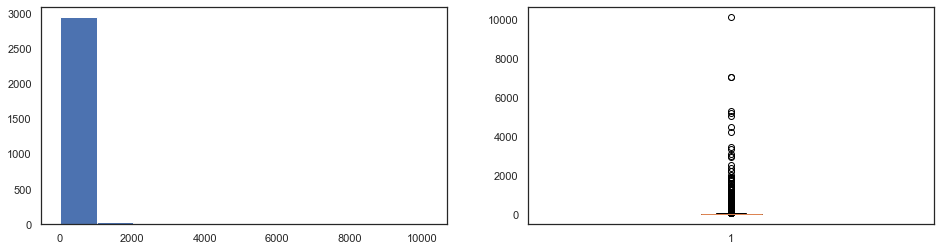

In [46]:
plotvar(df_norm,'"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"')

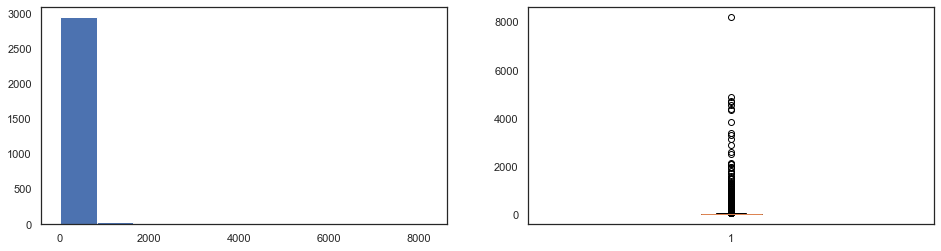

In [47]:
plotvar(df_norm,'"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"')

In [48]:
z_scores = stats.zscore(df_norm)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_norm[filtered_entries]
new_df.shape

(2769, 250)

In [49]:
new_df

,"""output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam""","""output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam""","""output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam""","""output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam""","""output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam""","""output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam""","""output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam""","""output.STAR.2_C11_Hypo_S131_Aligned.sortedByCoord.out.bam""","""output.STAR.2_C1_Norm_S103_Aligned.sortedByCoord.out.bam""","""output.STAR.2_C2_Norm_S104_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.4_H10_Hypo_S382_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"""
"""NDRG1""",0,1,0,0,654,1263,2634,540,0,13,...,481,1052,0,0,54,243,62,1263,925,1572
"""ADM""",0,0,0,0,0,31,0,2170,0,0,...,385,612,0,0,0,0,0,0,81,0
"""ITGA5""",0,0,0,17,192,211,427,98,78,106,...,210,603,0,0,68,1,67,167,481,152
"""PFKFB4""",0,67,54,94,86,344,1015,588,0,64,...,1019,865,0,0,1,173,118,707,909,147
"""TGFBI""",0,0,0,49,409,466,545,410,2,5,...,229,490,0,0,1,1,0,148,612,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""GRIK5""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""SLC25A27""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""DENND5A""",51,34,0,4,60,107,74,127,0,66,...,179,97,0,35,56,45,0,140,7,37
"""CDK5R1""",0,0,0,0,0,0,0,0,0,8,...,0,0,26,0,0,19,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

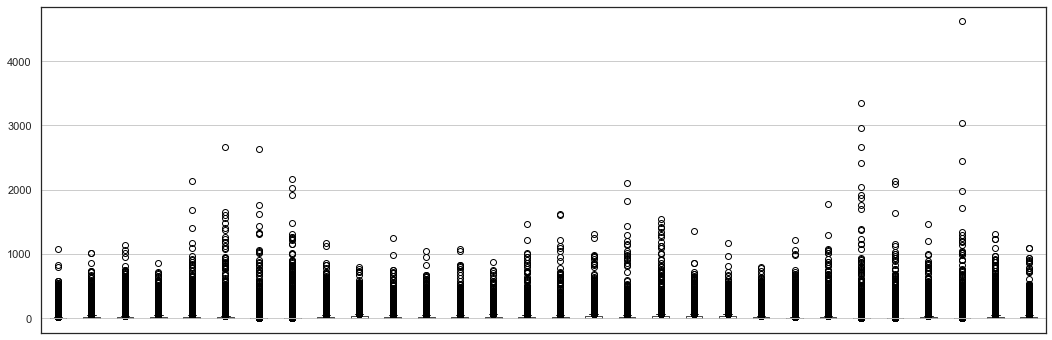

In [50]:
plt.figure(figsize=(18,6))
df_vis_z=new_df.iloc[:,:30]
ax=df_vis_z.boxplot()
ax.axes.xaxis.set_visible(False)
plt.show

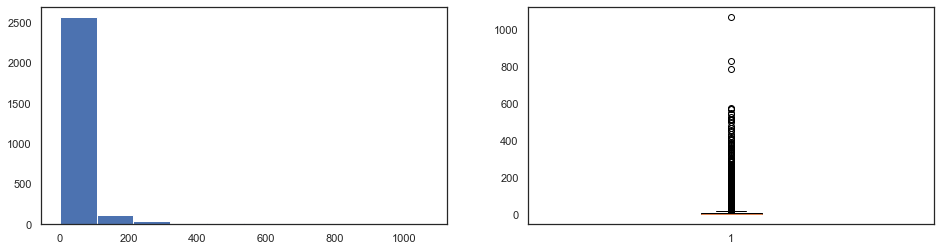

In [51]:
plotvar(new_df,	'"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"')

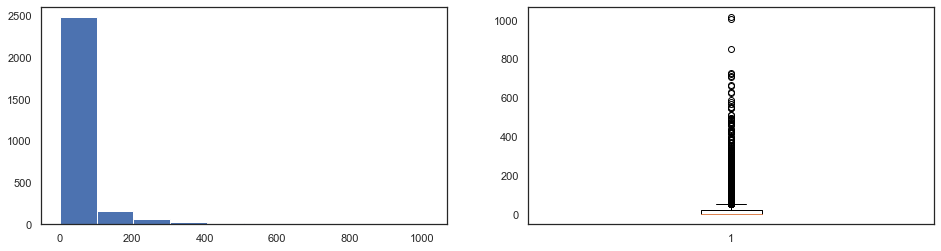

In [52]:
plotvar(new_df,'"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"')

# Isolation forest

Isolation Forest is based on the Decision Tree algorithm. It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the max and min values of that feature. This random partitioning of features will produce shorter paths in trees for the anomalous data points, thus distinguishing them from the rest of the data.

In [53]:
#df = pd.read_csv("C:\\Users\Luca\\Desktop\\SmartSeq\\HCC1806_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
df = pd.read_csv("/Users/khawl/Desktop/MCF7_SmartS_Unfiltered_Data (1).txt",delimiter="\ ",engine='python',index_col=0)
col=df.columns
df

,"""output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"""
"""WASH7P""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
"""MIR6859-1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""WASH9P""",1,0,0,0,0,1,10,1,0,0,...,1,1,0,0,0,0,1,1,4,5
"""OR4F29""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"""MTND1P23""",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""MT-TE""",4,0,0,0,3,3,0,0,14,1,...,0,4,12,4,0,1,6,0,7,4
"""MT-CYB""",270,1,76,66,727,2717,9326,3253,7949,30,...,239,3795,12761,2263,1368,570,3477,349,2184,1149
"""MT-TT""",0,0,0,0,0,1,1,1,4,0,...,0,7,4,2,0,0,3,0,2,2
"""MT-TP""",5,0,0,1,0,1,1,4,2,0,...,0,14,56,11,2,0,7,2,28,11


In [54]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
train

,"""output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"""
"""PKN2-AS1""",2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""SLIT1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,0
"""HMGCLL1""",7,0,0,1,0,1,9,12,9,0,...,5,62,0,0,0,8,4,2,0,0
"""TCERG1""",162,0,209,2,30,76,160,115,113,13,...,49,47,386,48,42,36,203,99,146,216
"""EMSLR""",0,0,0,0,2,4,9,1,4,0,...,0,6,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""LINC01176""",0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,0,4,0,2
"""GRN""",379,0,163,32,244,996,2166,1056,1894,36,...,302,961,0,740,628,508,817,347,1151,278
"""LDHAP1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""GMDS-DT""",29,0,0,0,0,4,0,6,1,0,...,6,0,0,0,0,0,24,0,0,0


In [55]:
from sklearn.ensemble import IsolationForest
from numpy import quantile, random, where
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(train[['"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"']])


IsolationForest(contamination=0.1, n_estimators=50)

In [56]:
train['scores']=model.decision_function(train[['"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"']])
train['anomaly']=model.predict(train[['"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"']])
train.head(20)

C:\Users\khawl\AppData\Local\Temp/ipykernel_15904/944947853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['scores']=model.decision_function(train[['"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"']])
C:\Users\khawl\AppData\Local\Temp/ipykernel_15904/944947853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['anomaly']=model.predict(train[['"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"']])


,"""output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam""",scores,anomaly
"""PKN2-AS1""",2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.077198,1
"""SLIT1""",0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0.183199,1
"""HMGCLL1""",7,0,0,1,0,1,9,12,9,0,...,0,0,0,8,4,2,0,0,0.058947,1
"""TCERG1""",162,0,209,2,30,76,160,115,113,13,...,386,48,42,36,203,99,146,216,-0.066471,-1
"""EMSLR""",0,0,0,0,2,4,9,1,4,0,...,0,0,0,0,0,0,0,0,0.183199,1
"""PTCHD3P1""",0,0,0,0,7,0,0,9,0,0,...,0,0,0,0,0,11,0,18,0.183199,1
"""ZBTB8OSP2""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.183199,1
"""PSMC2P1""",0,0,0,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0.183199,1
"""CDKN2B""",45,0,165,0,0,31,0,0,0,0,...,0,25,0,0,0,101,0,0,0.036761,1
"""ADAMTS1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.183199,1


In [57]:
outliers_counter = len(train[train['"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"'] > 300])
outliers_counter


364

## Conclusion
We can clearly see that the data is sparse(we have a lot of zero values). Because of that removing outliers is not an option since they hold valuable information.

# HCC Dataset

In [58]:
df=pd.read_csv("/Users/khawl/Desktop/HCC1806_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
#df = pd.read_csv("C:\\Users\Luca\\Desktop\\SmartSeq\\MCF7_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
col=df.columns
df

,"""output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"""
"""WASH7P""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""CICP27""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""DDX11L17""",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""WASH9P""",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
"""OR4F29""",2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""MT-TE""",22,43,0,0,0,3,47,4,2,8,...,24,15,15,4,4,26,1,4,4,20
"""MT-CYB""",4208,6491,25,4819,310,695,2885,1552,366,1829,...,1119,1429,808,999,916,3719,984,2256,981,2039
"""MT-TT""",26,62,0,11,4,0,41,9,2,8,...,48,31,3,8,5,42,1,15,6,34
"""MT-TP""",66,71,1,3,9,14,91,22,3,30,...,119,52,11,22,15,48,18,36,8,79


In [59]:
df.shape

(23396, 243)

### Visualize the outliers

<function matplotlib.pyplot.show(close=None, block=None)>

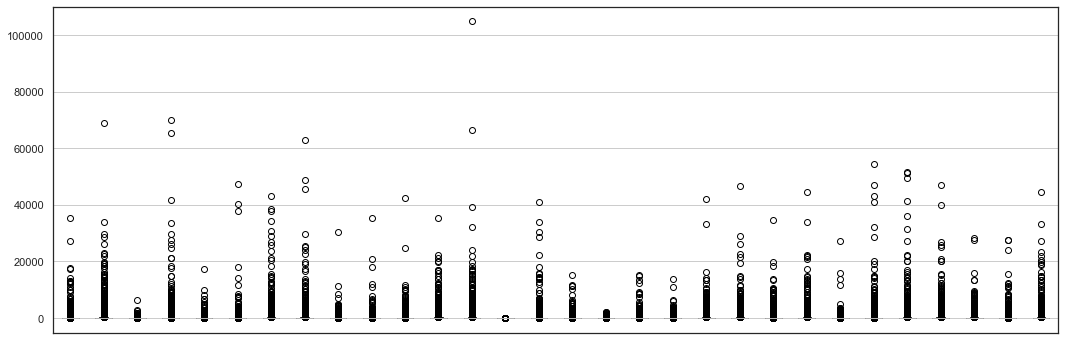

In [60]:
plt.figure(figsize=(18,6))
df_vis=df.iloc[:,:30]
ax=df_vis.boxplot()
ax.axes.xaxis.set_visible(False)
plt.show



In [61]:
def plotvar(df,variable):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(df[variable])
    plt.subplot(1,2,2)
    plt.boxplot(df[variable])
    plt.show()

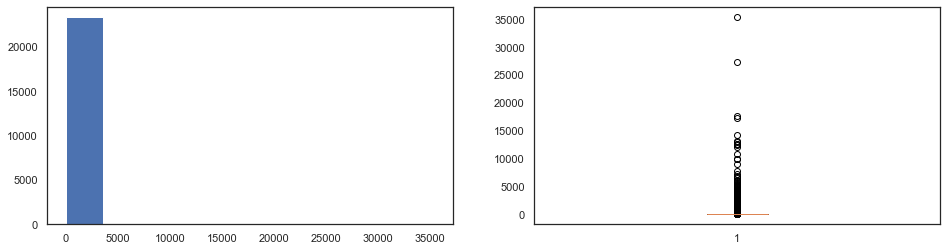

In [62]:
plotvar(df,	'"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"')

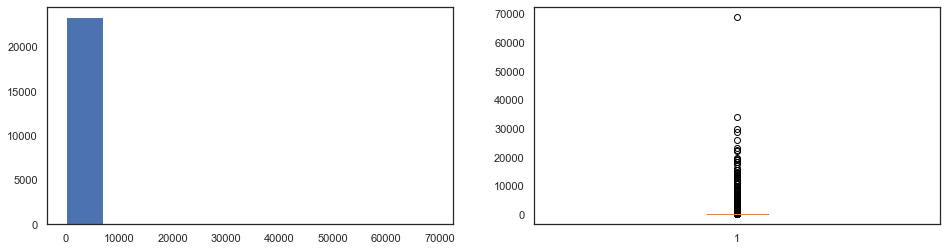

In [63]:
plotvar(df,'"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"')

### Using interquantile-range to remove outliers

In [64]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"     51.0
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     125.0
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"         5.0
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"       40.0
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"         22.0
                                                                          ...  
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"     76.0
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"     24.0
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"       68.0
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"      22.0
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"      44.0
Length: 243, dtype: float64


In [65]:
print("Old data set shape with Outliers ", df.shape)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("New data set shape without Outliers ", df_out.shape)

Old data set shape with Outliers  (23396, 243)
New data set shape without Outliers  (10815, 243)


In [66]:
df_out

,"""output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"""
"""WASH7P""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""CICP27""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""DDX11L17""",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""WASH9P""",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
"""OR4F29""",2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""MT-TF""",3,13,0,1,0,0,18,1,0,7,...,0,2,0,0,0,8,0,2,1,1
"""MT-TI""",3,3,0,2,1,2,12,1,0,3,...,0,1,0,0,0,4,1,1,1,0
"""MT-TS1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""MT-TD""",3,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

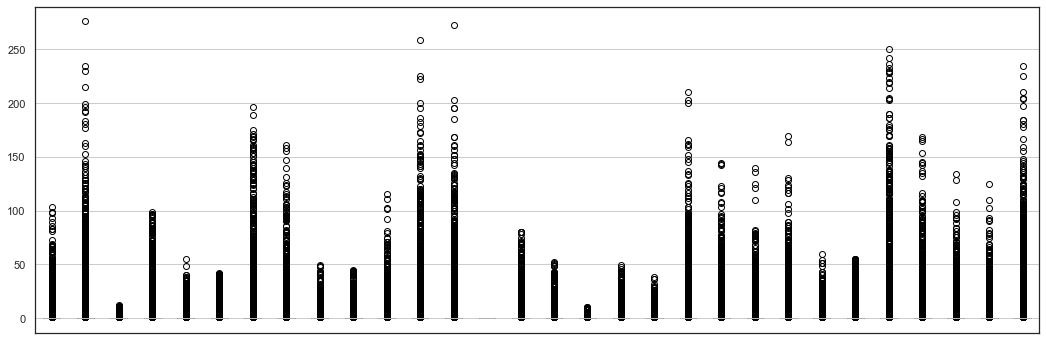

In [67]:
plt.figure(figsize=(18,6))
df_vis_out=df_out.iloc[:,:30]
ax=df_vis_out.boxplot()
ax.axes.xaxis.set_visible(False)
plt.show

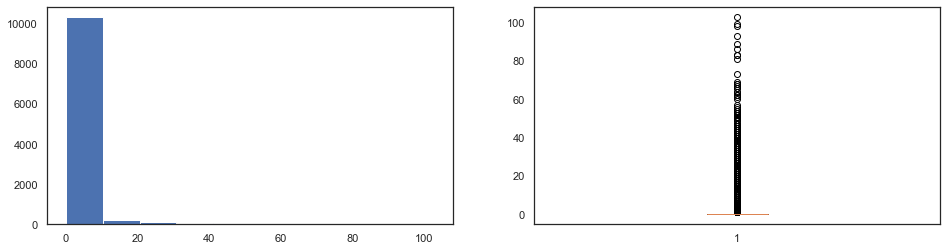

In [68]:
plotvar(df_out,	'"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"')

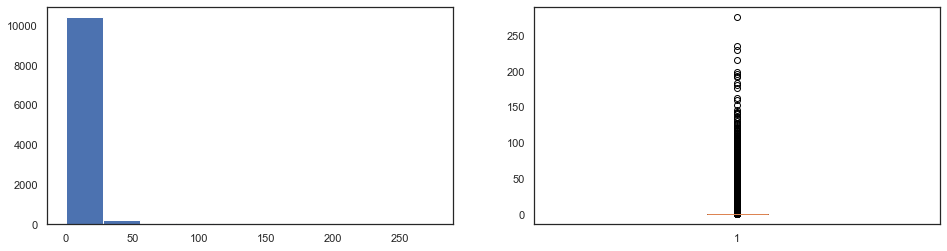

In [69]:
plotvar(df_out,'"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"')

### Using z-scores to remove outliers

In [70]:
df_norm= pd.read_csv("/Users/khawl/Desktop/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
df_norm

,"""output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1H1_Hypoxia_S103_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1H2_Hypoxia_S3_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"""
"""DDIT4""",0,8739,13098,2880,7777,208,750,127,10313,13523,...,341,5545,5757,8337,2579,79,167,10186,238,60
"""ANGPTL4""",48,2101,14032,356,5661,0,0,0,850,10110,...,10,2085,698,2383,65,5,1,3147,41,0
"""CALML5""",0,55,0,0,4383,1902,0,0,0,0,...,0,1587,0,0,0,0,0,0,2867,0
"""KRT14""",321,96,0,6211,0,0,5050,462,2127,0,...,0,0,3077,529,156,2098,27,149,814,7
"""CCNB1""",298,1824,1616,3,145,378,66,58,605,1444,...,204,26,50,588,411,554,3585,1012,2207,477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""LINC02693""",29,68,0,1,0,1,0,195,79,0,...,148,68,116,27,1,34,53,43,0,25
"""OR8B9P""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""NEAT1""",29,213,92,1,128,56,415,42,157,53,...,268,163,5,19,4,24,177,113,13,13
"""ZDHHC23""",0,0,0,0,0,0,0,18,35,0,...,0,0,0,38,145,0,53,0,5,4


<function matplotlib.pyplot.show(close=None, block=None)>

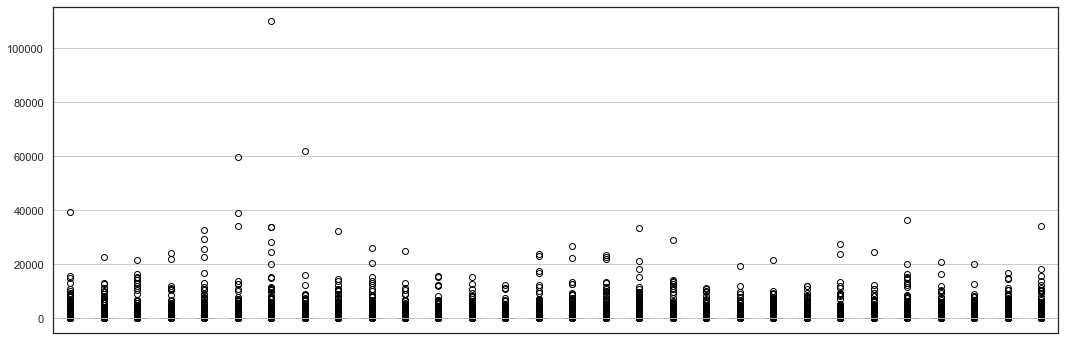

In [71]:
plt.figure(figsize=(18,6))
df_vis_norm=df_norm.iloc[:,:30]
ax=df_vis_norm.boxplot()
ax.axes.xaxis.set_visible(False)
plt.show

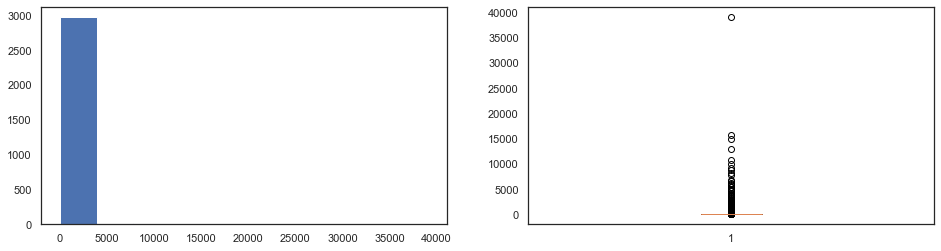

In [72]:
plotvar(df_norm,'"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"')

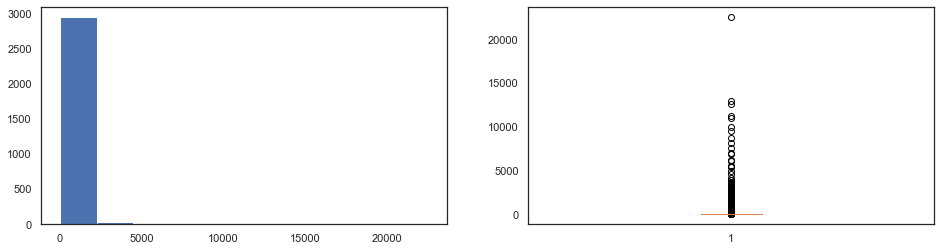

In [73]:
plotvar(df_norm,'"output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"')

In [74]:
z_scores = stats.zscore(df_norm)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_norm[filtered_entries]
new_df.shape

(2800, 182)

In [75]:
new_df

,"""output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1H1_Hypoxia_S103_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1H2_Hypoxia_S3_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"""
"""NDRG1""",0,522,348,592,206,41,42,15,138,452,...,33,585,1775,1461,1,64,11,744,1,1
"""LRRC38""",0,0,0,0,0,0,0,194,0,39,...,0,0,265,0,0,0,0,0,0,0
"""TMPRSS4""",0,86,0,240,0,0,0,0,0,0,...,209,13,0,41,0,0,0,0,0,0
"""EGLN3""",0,326,57,60,1190,0,0,0,38,4,...,70,341,308,348,1,0,0,0,0,0
"""CA9""",0,977,155,437,257,0,0,0,309,309,...,18,261,82,804,1,0,0,61,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""LINC02693""",29,68,0,1,0,1,0,195,79,0,...,148,68,116,27,1,34,53,43,0,25
"""OR8B9P""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""NEAT1""",29,213,92,1,128,56,415,42,157,53,...,268,163,5,19,4,24,177,113,13,13
"""ZDHHC23""",0,0,0,0,0,0,0,18,35,0,...,0,0,0,38,145,0,53,0,5,4


<function matplotlib.pyplot.show(close=None, block=None)>

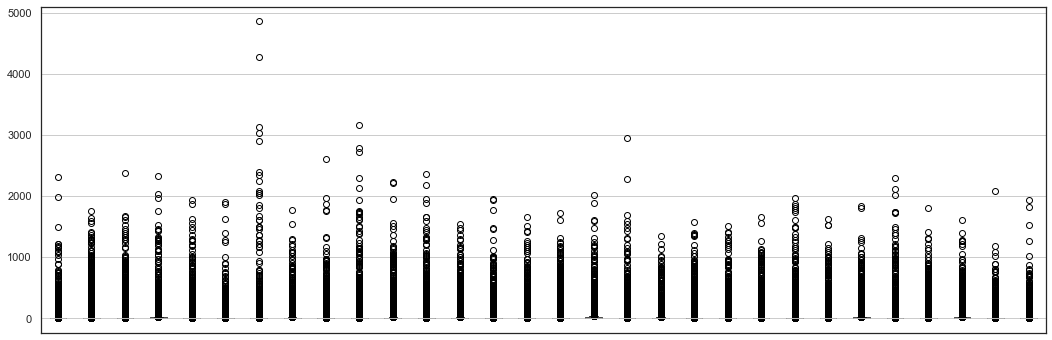

In [76]:
plt.figure(figsize=(18,6))
df_vis_z=new_df.iloc[:,:30]
ax=df_vis_z.boxplot()
ax.axes.xaxis.set_visible(False)
plt.show

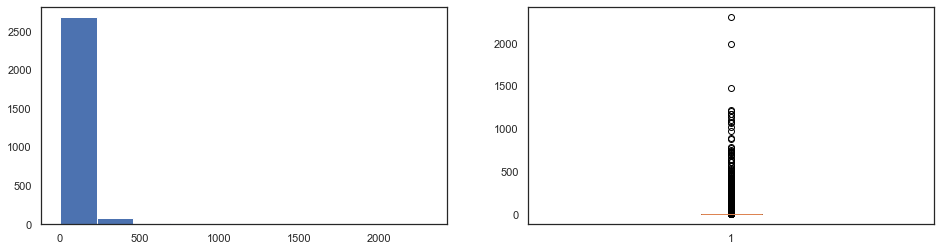

In [77]:
plotvar(new_df,'"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"')

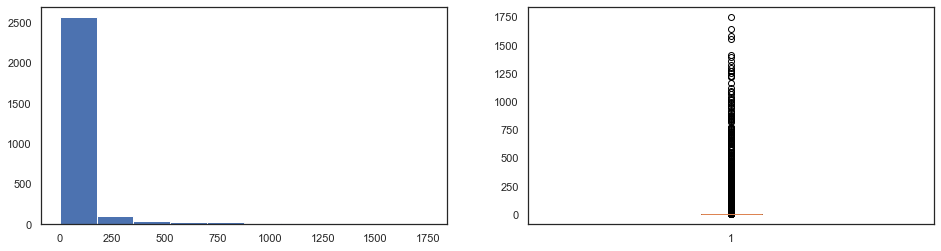

In [78]:
plotvar(new_df,'"output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"')

### Isolation forest

In [79]:
df = pd.read_csv("/Users/khawl/Desktop/HCC1806_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
col=df.columns
df

,"""output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"""
"""WASH7P""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""CICP27""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""DDX11L17""",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""WASH9P""",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
"""OR4F29""",2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""MT-TE""",22,43,0,0,0,3,47,4,2,8,...,24,15,15,4,4,26,1,4,4,20
"""MT-CYB""",4208,6491,25,4819,310,695,2885,1552,366,1829,...,1119,1429,808,999,916,3719,984,2256,981,2039
"""MT-TT""",26,62,0,11,4,0,41,9,2,8,...,48,31,3,8,5,42,1,15,6,34
"""MT-TP""",66,71,1,3,9,14,91,22,3,30,...,119,52,11,22,15,48,18,36,8,79


In [80]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
train

,"""output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"""
"""MITF""",0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,59,0,1,0,0,12
"""CLEC18B""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""ASNSP4""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""CSNK1E""",74,284,28,275,101,66,433,404,125,0,...,78,264,22,38,35,159,104,236,56,114
"""ZNF767P""",0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""KANSL1L""",0,0,0,0,0,0,33,1,0,1,...,6,3,1,0,2,0,3,13,0,4
"""SHLD2P2""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""KATNIP""",0,1,3,0,21,13,0,0,0,29,...,0,0,0,5,0,0,7,0,0,6
"""CYP2C8""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
from sklearn.ensemble import IsolationForest
from numpy import quantile, random, where
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(train[['"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"']])

IsolationForest(contamination=0.1, n_estimators=50)

In [82]:
train['scores']=model.decision_function(train[['"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"']])
train['anomaly']=model.predict(train[['"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"']])
train.head(20)

C:\Users\khawl\AppData\Local\Temp/ipykernel_15904/2614129848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['scores']=model.decision_function(train[['"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"']])
C:\Users\khawl\AppData\Local\Temp/ipykernel_15904/2614129848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['anomaly']=model.predict(train[['"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"']])


,"""output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam""","""output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam""",scores,anomaly
"""MITF""",0,0,3,0,0,0,0,0,0,0,...,0,0,59,0,1,0,0,12,0.188201,1
"""CLEC18B""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.188201,1
"""ASNSP4""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.188201,1
"""CSNK1E""",74,284,28,275,101,66,433,404,125,0,...,22,38,35,159,104,236,56,114,0.051309,-1
"""ZNF767P""",0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,22,0.188201,1
"""VAMP3""",250,423,4,0,42,120,300,142,49,26,...,65,62,0,186,55,377,82,242,-0.030978,-1
"""RALY-AS1""",12,0,2,0,0,0,0,18,0,13,...,4,0,0,2,0,0,4,1,0.051276,1
"""EIPR1""",4,496,14,236,29,124,0,0,30,61,...,19,27,43,117,37,162,47,75,0.083072,-1
"""SETBP1""",0,0,0,0,0,25,155,0,1,0,...,0,0,0,0,0,0,0,0,0.188201,1
"""VSIG2""",0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,1,0,0,0,0.188201,1


In [83]:
outliers_counter = len(train[train['"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"'] > 300])
outliers_counter

1356

# Conclusion
We can clearly see that the data is sparse(we have a lot of zero values). Because of that removing outliers is not an option since they hold valuable information.

# Sparsity of data

In [84]:
#A signal with most of its components being zero is called sparse. 
#We consider a signal sparse if more than half of it's entries are 0's 

def isSparse(data,m, n) :
     
    counter = 0
  
#Count number of zeros in the matrix
    for i in range(0,m) :
        for j in range(0,n) :
            if (data[i][j] == 0) :
                counter = counter + 1
  
    return (counter > ((m * n) // 2))
 

#Furthemore we can information about how much the matrix is sparse by knowing the percentage 
#of zero there is in the matrix

def sparsity_percentage(data, m, n):
    counter = 0 
    total = 0 
    for i in range(0, m):
        for j in range(0,n):
            total += 1
            if (data[i][j] == 0):
                counter = counter + 1
    percentage = 100*counter/total
    print('{}% of zero digits'.format(percentage))
        
N = open('/Users/khawl/Desktop/HCC1806_SmartS_Unfiltered_Data.txt', 'r')
matrix = []
for line in N:
    a = []
    temp = ''
    for i in range(len(line)):
        if not line[i].isdigit():
            if ((line[i] == ' ' and line[i-1].isdigit()) or line[i] == '\n'):
                a.append(int(temp))
                temp = ''
            else:
                continue
        else:
            temp += line[i]
    matrix.append(a)
    
N.close()

del matrix[0]

if (isSparse(matrix, len(matrix), len(matrix[1]))) :
    print("Yes")
else :
    print("No")
    
sparsity_percentage(matrix, len(matrix), len(matrix[1]))

H = open("/Users/khawl/Desktop/MCF7_SmartS_Unfiltered_Data (1).txt", 'r')
matrix = []
for line in H:
    a = []
    temp = ''
    for i in range(len(line)):
        if not line[i].isdigit():
            if ((line[i] == ' ' and line[i-1].isdigit()) or line[i] == '\n'):
                a.append(int(temp))
                temp = ''
            else:
                continue
        else:
            temp += line[i]
    matrix.append(a)
    
H.close()

del matrix[0]

if (isSparse(matrix, len(matrix), len(matrix[1]))) :
    print("Yes")
else :
    print("No")
    
sparsity_percentage(matrix, len(matrix), len(matrix[1]))


Yes
55.64153275822887% of zero digits
Yes
60.06720158037788% of zero digits


### conclusion: 
The data is very sparse, more that 55% and 60% of both data sets are composed of zero digits.

# Unsupervised Learning 

In [2]:
#df_smart = pd.read_csv("/Users/khawl/Desktop/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
#df_drop = pd.read_csv("/Users/khawl/Desktop/HCC1806_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
df_drop = pd.read_csv("/Users/khawl/Desktop/MCF7_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
df_smart = pd.read_csv("/Users/khawl/Desktop/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)

In [3]:
#df_meta=pd.read_csv('/Users/khawl/Desktop/HCC1806_SmartS_MetaData.tsv',delimiter="\t",engine='python',index_col=0)
#df_meta=pd.read_csv('/Users/khawl/Desktop/MCF7_SmartS_MetaData.tsv',delimiter="\t",engine='python',index_col=0)
#df_meta

In [4]:
df1 = df_smart + 1
df1_log2 = df1.apply(np.log2)
df_smart = df1_log2
#transpose_smart = df_smart.T 
#v = pd.DataFrame(transpose_smart)
#features = transpose_smart.columns
#print(v)
X= df_smart.to_numpy()
X_t = np.transpose(X)

In [5]:
df2 = df_drop + 1
df2_log2 = df2.apply(np.log2)
df_drop = df2_log2
transpose_drop = df_drop.T 
v = pd.DataFrame(transpose_drop)
features = transpose_drop.columns
print(v)
#X= df.to_numpy()
#X_t = np.transpose(X)

                         "MALAT1"  "MT-RNR2"  "NEAT1"  "H1-5"    "TFF1"  \
"AAAAACCTATCG_Normoxia"  1.000000   0.000000      0.0     0.0  2.321928   
"AAAACAACCCTA_Normoxia"  2.000000   0.000000      0.0     0.0  1.000000   
"AAAACACTCTCA_Normoxia"  2.000000   0.000000      0.0     0.0  1.000000   
"AAAACCAGGCAC_Normoxia"  2.807355   1.584963      0.0     0.0  1.000000   
"AAAACCTAGCTC_Normoxia"  2.321928   0.000000      0.0     0.0  0.000000   
...                           ...        ...      ...     ...       ...   
"TTTTCGCGTAGA_Hypoxia"   0.000000   0.000000      0.0     0.0  2.000000   
"TTTTCGTCCGCT_Hypoxia"   1.000000   0.000000      0.0     0.0  2.321928   
"TTTTCTCCGGCT_Hypoxia"   0.000000   0.000000      0.0     1.0  1.584963   
"TTTTGTTCAAAG_Hypoxia"   0.000000   0.000000      0.0     0.0  2.807355   
"TTTTTTGTATGT_Hypoxia"   2.321928   0.000000      0.0     0.0  0.000000   

                         "MT-RNR1"    "H4C3"  "GDF15"  "KRT81"  "MT-CO3"  ...  \
"AAAAACCTATCG_Norm

In [6]:
#samples = df.columns
#type(samples[1])
#samples[1]
#cond = df_meta.loc[samples,"Condition"]
#cond

In [7]:
cells = transpose_drop.index
transpose_drop['label'] = 0
for i in range(21626):
    if 'Hypoxia' in str(cells[i]):
        transpose_drop['label'].values[i] = 1
        

x_drop = transpose_drop.loc[:, features].values
        
print(transpose_drop['label'])

"AAAAACCTATCG_Normoxia"    0
"AAAACAACCCTA_Normoxia"    0
"AAAACACTCTCA_Normoxia"    0
"AAAACCAGGCAC_Normoxia"    0
"AAAACCTAGCTC_Normoxia"    0
                          ..
"TTTTCGCGTAGA_Hypoxia"     1
"TTTTCGTCCGCT_Hypoxia"     1
"TTTTCTCCGGCT_Hypoxia"     1
"TTTTGTTCAAAG_Hypoxia"     1
"TTTTTTGTATGT_Hypoxia"     1
Name: label, Length: 21626, dtype: int64


# PCA
It helps us to identify patterns in data based on the correlation between features. In a nutshell, PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

### PCA as data vizualisation 

Let's first try pca visualization on 2 dimensions: 

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_drop)

In [9]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_Df.tail()

,principal component 1,principal component 2
21621,5.204485,2.671623
21622,5.325438,1.234016
21623,5.146307,-0.379105
21624,1.161463,1.958777
21625,-1.171099,2.244076


In [10]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09113708 0.02143399]


From the above output, you can observe that the principal component 1 holds only 5% of the information while the principal component 2 holds only 2% of the information. 
Also, the other point to note is that while projecting 3000-dimensional data to a two-dimensional data, 93% information was lost.

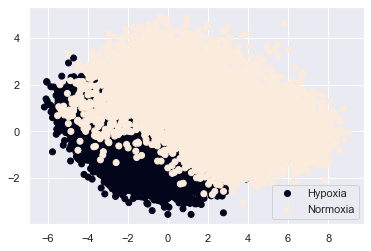

In [11]:
plt.figure()
plot = plt.scatter(principalComponents[:,0], principalComponents[:,1], c=transpose_drop['label'])
plt.legend(handles=plot.legend_elements()[0], labels=["Hypoxia","Normoxia"])
plt.show()

using only two components, doesn't help us much identify any clusters in the data, so let's try adding a third component and see what happens: 

In [12]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_drop)

In [13]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',' principal component 3'])
principal_Df.tail()

,principal component 1,principal component 2,principal component 3
21621,5.204485,2.671641,-0.467536
21622,5.325438,1.233923,0.719323
21623,5.146307,-0.379048,0.505702
21624,1.161463,1.958697,-1.158871
21625,-1.171099,2.244231,0.136673


<Figure size 432x288 with 0 Axes>

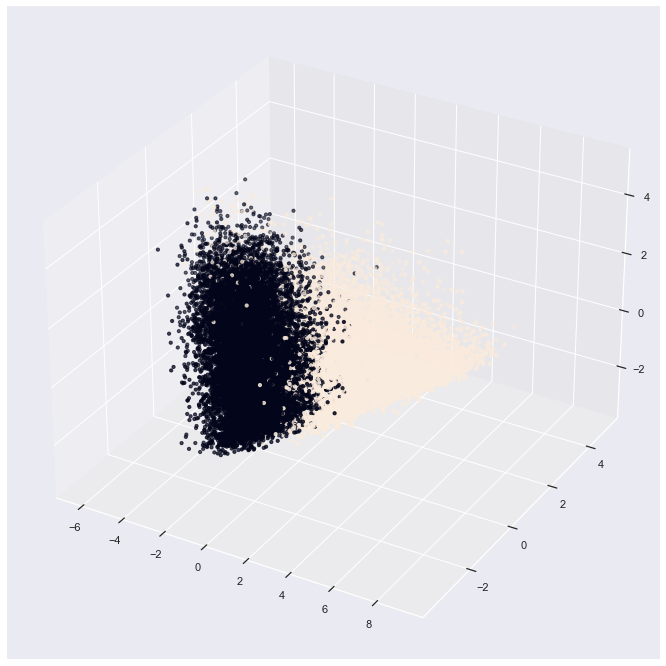

In [14]:
#%matplotlib noteb
lt.figure()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(principalComponents[:,0],principalComponents[:,1], principalComponents[:,2], c =transpose_drop['label'], s = 10)
plt.show()ook


as expected, adding a third component gave us a little more information about the data, enough for us to be able to indentify two different clusters, which at some extent are linearly seperable

In [15]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09113708 0.02143399 0.01534844]


The amount of information gained increased by 1% after adding the third component. 
Now let's use other dimentionality reduction to have a closer look into these clusters.

# t-SNE
It is also a unsupervised non-linear dimensionality reduction and data visualization technique. It embeds the points from a higher dimension to a lower dimension trying to preserve the neighborhood of that point.

Unlike PCA it tries to preserve the Local structure of data by minimizing KL divergence between the two distributions with respect to the locations of the points in the map.

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(x_drop)
X_reduced_tsne.shape

(21626, 2)

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne_s = tsne.fit_transform(X_t)
X_reduced_tsne_s.shape

(250, 2)

# IsoMap
It stands for isometric mapping. Isomap is a non-linear dimensionality reduction method based on the spectral theory which tries to preserve the geodesic distances in the lower dimension. Isomap starts by creating a neighborhood network. After that, it uses graph distance to the approximate geodesic distance between all pairs of points. And then, through eigenvalue decomposition of the geodesic distance matrix, it finds the low dimensional embedding of the dataset.

In [18]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(x_drop)
X_reduced_isomap.shape

(21626, 2)

In [19]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap_s = isomap.fit_transform(X_t)
X_reduced_isomap_s.shape

(250, 2)

# Comparison of dimensionality reduction methods
Let's compare some of our dimensionality reduction method in order to understand 
why it's a good thing to try a lot of them out
T-SNE is a non linear dimensionality reduction method and is therefore computationally expensive 
it can take up to several hours, contrary to the PCA test which is must faster since it is a linear dimensionality 
reduction method. In fact it's better to run PCA before running t-SNE to reduce the number of original variables. 
Using different methods is also key when trying to identify clusters that may not appear in only one method 
for example t-SNE fails to preserve the global geometry but produces well-separated clusters whereas
PCA preserves the global data structure but fail to preserve the similarities within the clusters; by having the results of 
both dimensionality reduction methods we can have a glance at both sides of the spectrum and therefore identify any incoherence 
between the resulting clusters or simply have more confluences whereas we found the optimal number of clusters for our dataset

# Clustering using K-means


# Inertia
It is defined as the mean squared distance between each instance and its closest centroid. Logically, as per the definition lower the inertia better the model.

K-means using the data reduced by PCA

In [20]:
pca = PCA(n_components=2)
pca.fit(x_drop)
x_pca = pca.transform(x_drop)
print("original shape:   ", transpose_drop.shape)
print("transformed shape:", x_pca.shape)


original shape:    (21626, 3001)
transformed shape: (21626, 2)


In [21]:
pca = PCA(n_components=2)
pca.fit(X_t)
X_pca = pca.transform(X_t)
print("original shape:   ", X_t.shape)
print("transformed shape:", X_pca.shape)

original shape:    (250, 3000)
transformed shape: (250, 2)


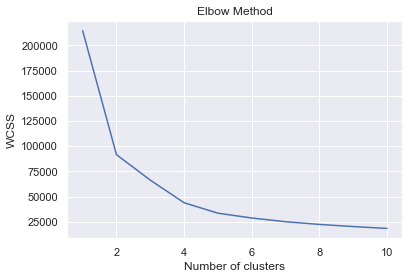

In [22]:
from sklearn.cluster import KMeans
plt.figure()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

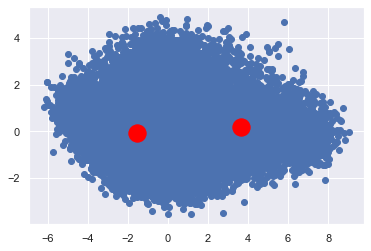

In [23]:
plt.figure()
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x_pca)
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [24]:
kmeans.inertia_

91535.47200534662

C:\Users\Luca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


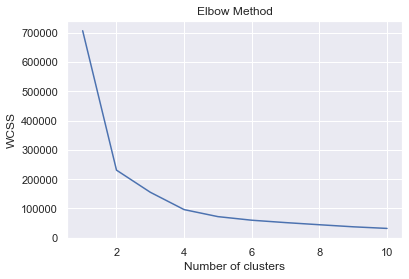

In [25]:
plt.figure()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

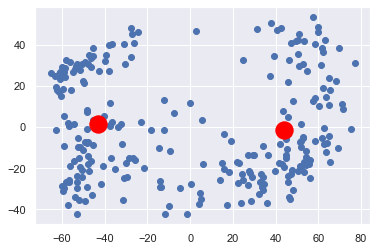

In [26]:
plt.figure()
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [27]:
kmeans.inertia_

230980.32264212816

K-means using the data reduced by t-SNE

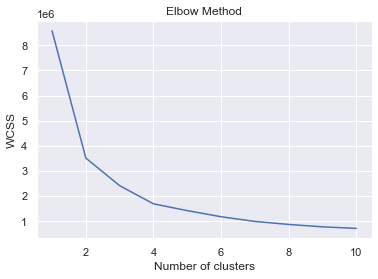

In [28]:
plt.figure()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced_tsne)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

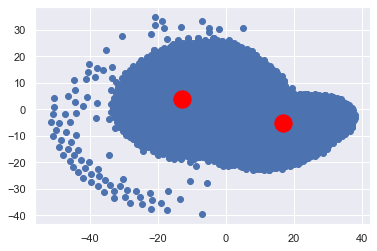

In [29]:
plt.figure()
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_reduced_tsne)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [30]:
kmeans.inertia_

3512232.5

C:\Users\Luca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


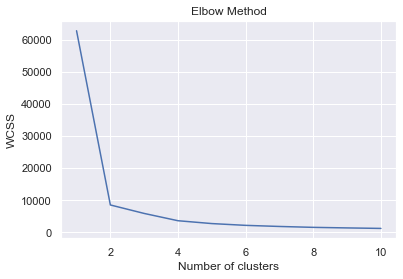

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced_tsne_s)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

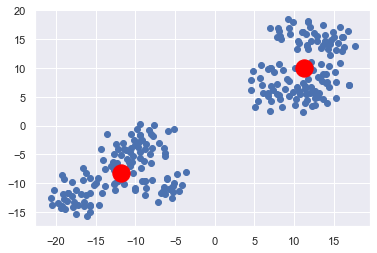

In [32]:
plt.figure()
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_reduced_tsne_s)
plt.scatter(X_reduced_tsne_s[:,0], X_reduced_tsne_s[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()


In [33]:
kmeans.inertia_

8506.6591796875

K-means using the data reduced by IsoMap

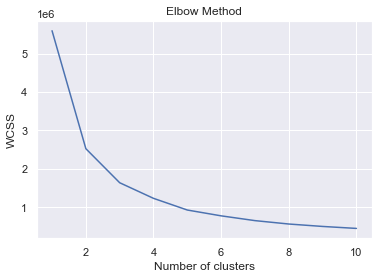

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced_isomap)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

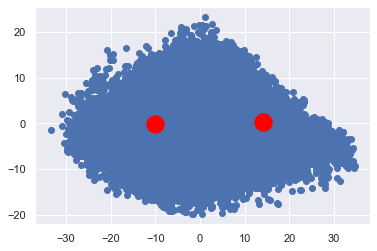

In [35]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_reduced_isomap)
plt.scatter(X_reduced_isomap[:,0], X_reduced_isomap[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [36]:
kmeans.inertia_

2523840.8036114043

C:\Users\Luca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


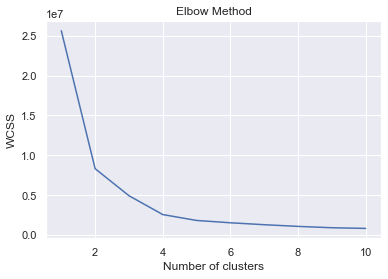

In [37]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced_isomap_s)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

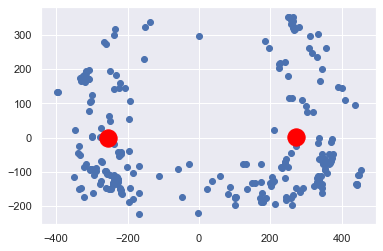

In [38]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_reduced_isomap_s)
plt.scatter(X_reduced_isomap_s[:,0], X_reduced_isomap_s[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [39]:
kmeans.inertia_

8324491.896551366

K-means on the non-reduced data

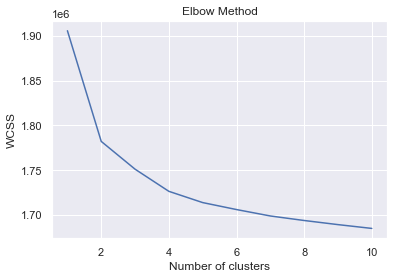

In [41]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_drop)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

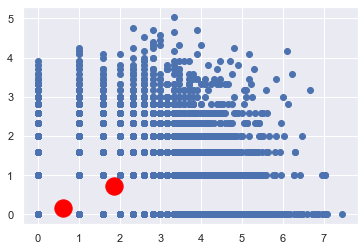

In [42]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x_drop)
plt.scatter(x_drop[:,0], x_drop[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

C:\Users\Luca\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


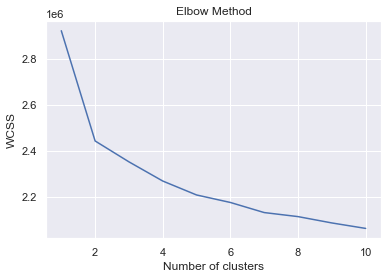

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_t)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

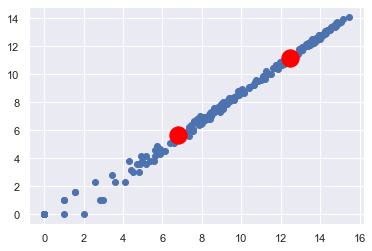

In [44]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_t)
plt.scatter(X_t[:,0], X_t[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Conclusions


We can see that there is a clear difference between DropSeq and SmartSeq Rna methods from
the results of our analysis. Smart sequencing gave us clear and defined clusters after dimensionality reduction ; 2 well defined clusters.
whereas DropSeq only gave us a bunch of stacked points that correspond to two very compact clusters. 
In other words, the smartseq clearly shows the distinction between cells with normoxia and hypoxia contraty to dropseq which is just overflowing with "irrelevant" data even after being cleaned and reduced.
The criteria we used to decide the number of clusters is the elbow method 
The Elbow method looks at the total WSS (within cluster sum square) as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS
In the graphs it is represented by the point at which the curve's growth approaches 0.


# Supervised learning

First we load MCF7_Filtered_Normalised_3000 data

In [5]:
df_M=pd.read_csv("DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)

Let's check hypoxia/normoxia ratio:

In [6]:
Y = []
for x in df_M.columns:
    if 'Hypo' in x:
        Y.append(1)
    else:
        Y.append(0)
Y = np.array(Y)
print('Ratio of cell types: ')
print('Hypoxia: ' ,Y.mean())
print('Normoxia: ', 1 - Y.mean())

Ratio of cell types: 
Hypoxia:  0.4125127161749746
Normoxia:  0.5874872838250254


As can be seen, there are about 41% hypoxia cells, and 59% normoxia cells.

After inspecting the data set, it can be seen that the first part of the data is only normoxia cells, and the second part is only hypoxia cells. In order to split the data set into training and testing sets fairly, we randomise the order of cells in the data set.

In [7]:
import random
random.seed(19)
shuffled = random.sample(list(df_M.columns), k=len(df_M.columns))
# Making randomised samples for testing and training, since samples in original dataset are grouped together by classification
for x in shuffled:
    if x not in list(df_M.columns):
        print(x)
df_Mshuffled = df_M.reindex(shuffled, axis='columns')

In [8]:
df_Mshuffled

,"""AGCGGGGGTGAG_Normoxia""","""CTCCACCCTCGT_Hypoxia""","""CCGCCCTTTCTT_Normoxia""","""CGTGGCCACAGA_Hypoxia""","""CTGTATAGGCGG_Normoxia""","""AACGGGCCCCTC_Hypoxia""","""TGACTTACGACT_Normoxia""","""CTGGGTAGTACC_Hypoxia""","""GTCCATCCCATC_Normoxia""","""GGTGGATGTTAT_Hypoxia""",...,"""CACCGTGCGGTA_Normoxia""","""CCAACAGCATAA_Hypoxia""","""CCAGAGAGTGCT_Hypoxia""","""AGCACCTCGTAC_Hypoxia""","""CTTCGTATGGCG_Normoxia""","""ATGGTCAGAGAT_Normoxia""","""TGCAATATCATG_Hypoxia""","""CCGGATCCGGGA_Hypoxia""","""AGATCACATATA_Hypoxia""","""AGTTGTATTTTT_Normoxia"""
"""MALAT1""",0,0,2,1,0,1,2,0,0,0,...,0,2,8,0,1,1,0,1,0,22
"""MT-RNR2""",2,0,0,0,1,0,2,0,2,0,...,0,0,0,0,2,1,0,0,0,0
"""NEAT1""",0,0,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
"""H1-5""",0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""TFF1""",0,6,0,3,1,1,2,2,0,4,...,2,1,0,8,0,1,4,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""BRWD1-AS2""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""RPS19BP1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AUNIP""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""TNK2""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_M=pd.read_csv("DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
df_M


,"""AAAAACCTATCG_Normoxia""","""AAAACAACCCTA_Normoxia""","""AAAACACTCTCA_Normoxia""","""AAAACCAGGCAC_Normoxia""","""AAAACCTAGCTC_Normoxia""","""AAAACCTCCGGG_Normoxia""","""AAAACTCGTTGC_Normoxia""","""AAAAGAGCTCTC_Normoxia""","""AAAAGCTAGGCG_Normoxia""","""AAAATCGCATTT_Normoxia""",...,"""TTTTACAGGATC_Hypoxia""","""TTTTACCACGTA_Hypoxia""","""TTTTATGCTACG_Hypoxia""","""TTTTCCAGACGC_Hypoxia""","""TTTTCGCGCTCG_Hypoxia""","""TTTTCGCGTAGA_Hypoxia""","""TTTTCGTCCGCT_Hypoxia""","""TTTTCTCCGGCT_Hypoxia""","""TTTTGTTCAAAG_Hypoxia""","""TTTTTTGTATGT_Hypoxia"""
"""MALAT1""",1,3,3,6,4,5,1,13,3,3,...,0,2,1,0,1,0,1,0,0,4
"""MT-RNR2""",0,0,0,2,0,0,2,1,7,0,...,0,0,0,0,0,0,0,0,0,0
"""NEAT1""",0,0,0,0,0,2,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
"""H1-5""",0,0,0,0,0,2,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
"""TFF1""",4,1,1,1,0,0,0,2,0,1,...,2,3,8,0,0,3,4,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""BRWD1-AS2""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""RPS19BP1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""AUNIP""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""TNK2""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#This is just a quick check that new dataframe is same as the old one
#just with shuffled samples
#for x in shuffled:
#    if df_Mshuffled.loc[:, x][1] != df_M.loc[:, x][1]:
#        print(x)

In [11]:
df_Mshuffled.shape

(3000, 21626)

In [12]:
# Making train and test datasets, split 80:20.
# We are transposing X because individual cells here are samples.

X_train = (df_Mshuffled.iloc[:, :17300].to_numpy()).T
X_test = (df_Mshuffled.iloc[:, 17300:].to_numpy()).T

Y_train, Y_test = [],[]

#Values hardcoded for MCF7_Filtered_Normalised data set
for i in range(17300):
    if 'Hypo' in df_Mshuffled.columns[i]:
        Y_train.append(1)
    else:
        Y_train.append(0)
        
for i in range(17300, 21626):
    if 'Hypo' in df_Mshuffled.columns[i]:
        Y_test.append(1)
    else:
        Y_test.append(0)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

#Let's see distribution of our randomised samples:
print('Train ratio:')
print('Hypoxia: ' +str(Y_train.mean())+ '  Normoxia: '+str(1-Y_train.mean()))
print('Test ratio:')
print('Hypoxia: ', Y_test.mean(), '  Normoxia: ', 1-Y_test.mean())
print('Total ratio of cell types: ')
print('Hypoxia: ' ,Y.mean(), '  Normoxia: ', 1 - Y.mean())


Train ratio:
Hypoxia: 0.4131791907514451  Normoxia: 0.586820809248555
Test ratio:
Hypoxia:  0.40984743411927876   Normoxia:  0.5901525658807212
Total ratio of cell types: 
Hypoxia:  0.4125127161749746   Normoxia:  0.5874872838250254


Test and training samples seem randomised well enough, and their data structure seems intact.

In [13]:
import time      #Used to measure model training time

Let's first try the multinomial naive bayes classifier. It is a probabilistic learning method, and it is based on Bayes theorem.

In [14]:
Models = []
scores_test, scores_train = [], []
train_time = []
from sklearn.naive_bayes import MultinomialNB

start = time.time()

Multinomial_Model = MultinomialNB().fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")
print("Accuracy on train data: ", Multinomial_Model.score(X_train, Y_train))
print("Accuracy on test data: " , Multinomial_Model.score(X_test, Y_test))
train_time.append(end - start)
Models.append('Multinomial')
scores_test.append(Multinomial_Model.score(X_test, Y_test))
scores_train.append(Multinomial_Model.score(X_train, Y_train))
bayes=Multinomial_Model

Training time:  0.8491640090942383 seconds
Accuracy on train data:  0.9167052023121387
Accuracy on test data:  0.9163199260286639


Now decision tree classifier.

In [15]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()

DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")
print("Accuracy on train data: ", DecisionTree.score(X_train, Y_train))
print("Accuracy on test data: ", DecisionTree.score(X_test, Y_test))
train_time.append(end - start)
Models.append('DecisionTree')
scores_test.append(DecisionTree.score(X_test, Y_test))
scores_train.append(DecisionTree.score(X_train, Y_train))
dtc=DecisionTree

Training time:  11.615735054016113 seconds
Accuracy on train data:  1.0
Accuracy on test data:  0.911465557096625


Random forest.

In [16]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()

RandomForest = RandomForestClassifier(n_estimators=25, max_depth=10)
RandomForest.fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")
print("Accuracy on train data: ", RandomForest.score(X_train, Y_train))
print("Accuracy on test data: ", RandomForest.score(X_test, Y_test))

train_time.append(end - start)
Models.append('RandomForest')
scores_test.append(RandomForest.score(X_test, Y_test))
scores_train.append(RandomForest.score(X_train, Y_train))
rfc=RandomForest

Training time:  1.86692214012146 seconds
Accuracy on train data:  0.9573988439306358
Accuracy on test data:  0.9429033749422099


Support Vector Machine.

In [17]:
from sklearn.svm import LinearSVC

start = time.time()

SVC = LinearSVC(C=0.0001)
SVC.fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")

print("Accuracy on train data: ", SVC.score(X_train, Y_train))
print("Accuracy on test data: ", SVC.score(X_test, Y_test))

train_time.append(end - start)
Models.append('SVC')
scores_test.append(SVC.score(X_test, Y_test))
scores_train.append(SVC.score(X_train, Y_train))
svm=SVC

Training time:  0.7028627395629883 seconds
Accuracy on train data:  0.9701156069364162
Accuracy on test data:  0.9676375404530745


Logistic regression.

In [18]:
from sklearn.linear_model import LogisticRegression

start = time.time()

Logistic_Regression=LogisticRegression(max_iter=1000)
Logistic_Regression.fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")

print("Accuracy on train data: ", Logistic_Regression.score(X_train, Y_train))
print("Accuracy on test data: " , Logistic_Regression.score(X_test, Y_test))

train_time.append(end - start)
Models.append('LogisticReg')
scores_test.append(Logistic_Regression.score(X_test, Y_test))
scores_train.append(Logistic_Regression.score(X_train, Y_train))
logi=Logistic_Regression

Training time:  11.324814081192017 seconds
Accuracy on train data:  0.9989595375722543
Accuracy on test data:  0.9750346740638003


We also tried the K nearest neighbours classifier, but it took very long time to train (at least on our machines). In addition, it scored worse than other models. It seems like KNN is not very useful for this kind of data, and at the start we decide to exclude it's analysis.

In [19]:
#Trains very slowly, accuracy is low as well.
#from sklearn.neighbors import KNeighborsClassifier
#start = time.time()
#KNN = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
#KNN.fit(X_train, Y_train)
#end = time.time()
#print("Training time: ", end - start, "seconds")
#print("train shape: " + str(X.T.shape))
#print("Accuracy on train data: ", knn.score(X_train, Y_train))
#print("Accuracy on test data: ", knn.score(X_test, Y_test))
#train_time.append(end - start)
#Models.append('KNN')
#scores_test.append(KNN.score(X_test, Y_test))
#scores_train.append(KNN.score(X_train, Y_train))

Finally, let's try neural network:

In [20]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

#Make validation sets

X_validation=X_train[:1000]
Y_validation=Y_train[:1000]

X_partial_train=X_train[1000:]
Y_partial_train=Y_train[1000:]

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(3000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

start = time.time()
model.fit(X_partial_train,Y_partial_train,epochs=4,batch_size=512,validation_data=(X_validation, Y_validation))
end = time.time()

print("Training time: ", end - start, "seconds")
print("Accuracy on test data: " , model.evaluate(X_test, Y_test)[1])
print("Accuracy on train data: ", model.evaluate(X_train, Y_train)[1])

train_time.append(end - start)
Models.append('NeuralNetwork')
scores_test.append(model.evaluate(X_test,Y_test)[1])
scores_train.append(model.evaluate(X_train,Y_train)[1])
nn=model

Epoch 1/4
32/32 [==============================] - 1s 16ms/step - loss: 0.3126 - accuracy: 0.8999 - val_loss: 0.1504 - val_accuracy: 0.9650
Epoch 2/4
32/32 [==============================] - 0s 11ms/step - loss: 0.1043 - accuracy: 0.9716 - val_loss: 0.0908 - val_accuracy: 0.9760
Epoch 3/4
32/32 [==============================] - 0s 10ms/step - loss: 0.0605 - accuracy: 0.9826 - val_loss: 0.0672 - val_accuracy: 0.9830
Epoch 4/4
32/32 [==============================] - 0s 11ms/step - loss: 0.0438 - accuracy: 0.9870 - val_loss: 0.0659 - val_accuracy: 0.9840
Training time:  2.204310894012451 seconds
136/136 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9794
Accuracy on test data:  0.9794267416000366
541/541 [==============================] - 1s 1ms/step - loss: 0.0347 - accuracy: 0.9905
Accuracy on train data:  0.9904624223709106
541/541 [==============================] - 1s 2ms/step - loss: 0.0347 - accuracy: 0.9905


# Model performance assesment

At first glance it seems all models did fairly well. Let's first plot some of the metrics from training and testing:


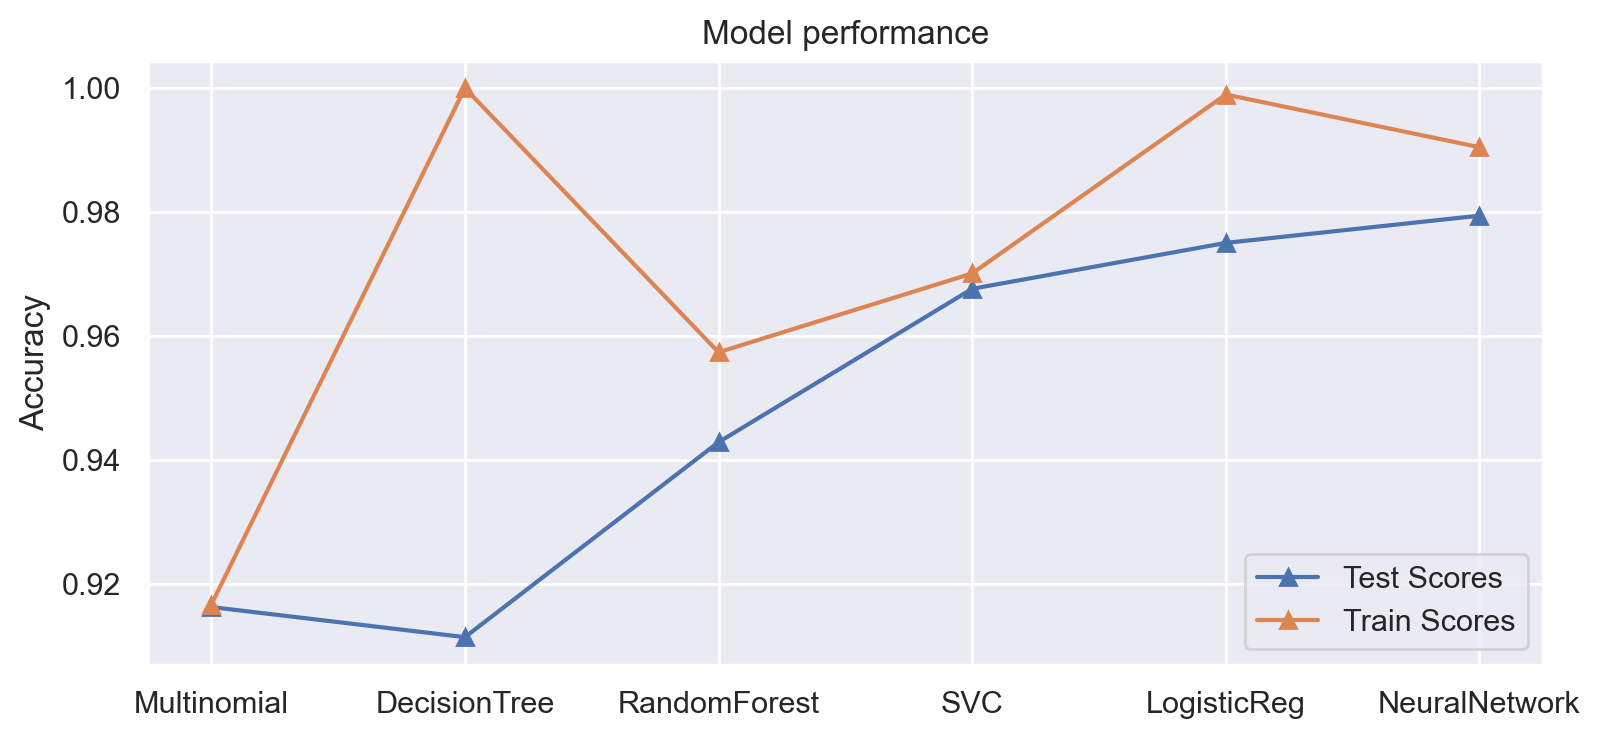

In [21]:
plt.figure(figsize=(9, 4), dpi=200)
plt.plot(Models, scores_test, marker='^', label='Test Scores')
plt.plot(Models, scores_train, marker='^', label='Train Scores')
plt.ylabel('Accuracy')
plt.title('Model performance')
plt.legend()

In [22]:
for i in range(len(Models)):
    print(Models[i]+' test score: ', scores_test[i], ' train score: ', scores_train[i])

Multinomial test score:  0.9163199260286639  train score:  0.9167052023121387
DecisionTree test score:  0.911465557096625  train score:  1.0
RandomForest test score:  0.9429033749422099  train score:  0.9573988439306358
SVC test score:  0.9676375404530745  train score:  0.9701156069364162
LogisticReg test score:  0.9750346740638003  train score:  0.9989595375722543
NeuralNetwork test score:  0.9794267416000366  train score:  0.9904624223709106


Text(0.5, 1.0, 'Model training times')

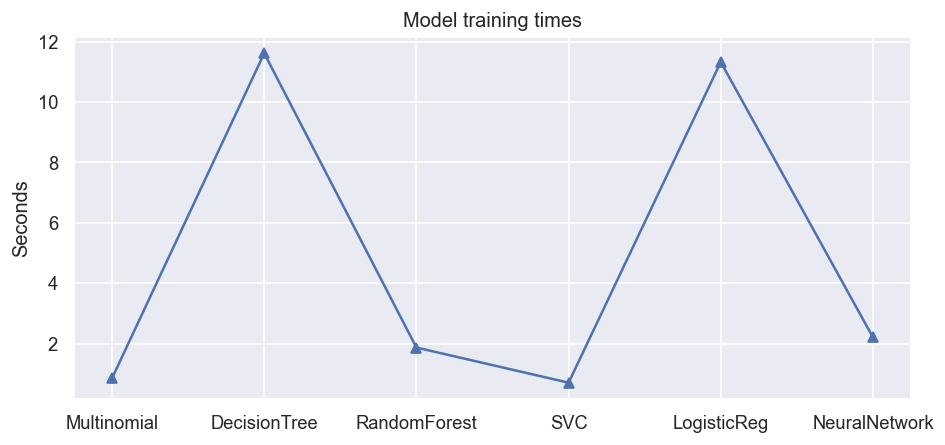

In [23]:
plt.figure(figsize=(9, 4), dpi=120)
plt.plot(Models, train_time, marker='^')
plt.ylabel('Seconds')
plt.title('Model training times')

As we can see on our plots, neural network classifier has classified 97.8% of the cells from test set correctly. This was the highest accuracy on the test sample out of all models. In addition, the test data score is very close to the training set score, which means it does not have trouble with overfitting and also has a very reasonable training time.

Logistic regression performed almost as well on the test set, but seems to have a slightly bigger gap between train and test set classification performance, as well as much longer training time, almost 5 times of the neural network.

Another model which took a lot of time to be train with respect to others, is the decision tree classifier. Additionaly, it is the worst case of overfitting and has lowest predicting accuracy as well, making it the worst model for this type of data.

Support vector machine also predicts with very high accuracy, and is very efficient to be trained. It is also the second least model subject to overfitting issues, right after the naive bayes model.

Overall, neural network seems like the best choice for this experiment and cell line, although rest of the models are not too behind it, and can be used as high accuracy classifiers as well.



# DropSeq/MCF7 - Total training data
Here we train the neural network on the full data set, and after that we use it for predicting the unlabeled data set.

In [24]:
X_train = (df_Mshuffled.to_numpy()).T
Y_train = []
for i in range(len(df_Mshuffled.columns)):
    if 'Hypo' in df_Mshuffled.columns[i]:
        Y_train.append(1)
    else:
        Y_train.append(0)
Y_train=np.array(Y_train)

In [25]:
start = time.time()
Logistic_Regression=LogisticRegression(max_iter=1000)
Logistic_Regression.fit(X_train, Y_train)
end = time.time()
print("Training time: ", end - start, "seconds")
print("Accuracy on train data: ", Logistic_Regression.score(X_train, Y_train))

Training time:  16.019779920578003 seconds
Accuracy on train data:  0.9983815777305096


In [26]:
#Neural Network
X_validation=X_train[:1000]
Y_validation=Y_train[:1000]
X_partial_train=X_train[1000:]
Y_partial_train=Y_train[1000:]
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(3000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
model.fit(X_partial_train,Y_partial_train,epochs=4,batch_size=512,validation_data=(X_validation, Y_validation))
end = time.time()
print("Training time: ", end - start, "seconds")
print("Accuracy on test data: ", model.evaluate(X_train, Y_train)[1])

Epoch 1/4
41/41 [==============================] - 1s 15ms/step - loss: 0.3409 - accuracy: 0.8839 - val_loss: 0.1556 - val_accuracy: 0.9650
Epoch 2/4
41/41 [==============================] - 0s 12ms/step - loss: 0.0987 - accuracy: 0.9763 - val_loss: 0.0816 - val_accuracy: 0.9800
Epoch 3/4
41/41 [==============================] - 1s 13ms/step - loss: 0.0551 - accuracy: 0.9838 - val_loss: 0.0687 - val_accuracy: 0.9840
Epoch 4/4
41/41 [==============================] - 0s 11ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0692 - val_accuracy: 0.9820
Training time:  2.741736888885498 seconds
676/676 [==============================] - 1s 2ms/step - loss: 0.0324 - accuracy: 0.9910
Accuracy on test data:  0.9910293221473694


In [27]:
test_data=pd.read_csv("DropSeq/MCF7_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter="\ ",engine='python',index_col=0)

In [28]:
test=test_data.to_numpy().T
predictionMCF7_Drop = model.predict(test)

169/169 [==============================] - 0s 1ms/step


In [29]:
predictionMCF7_Drop_Str=[]     #in case we need 'Hypo' or 'Norm' classificatio instead of 1 and 0
for i in range(len(predictionMCF7_Drop)):
    if predictionMCF7_Drop[i]>=0.5:
        predictionMCF7_Drop[i]=1
        predictionMCF7_Drop_Str.append('Hypo')
    else:
        predictionMCF7_Drop[i]=0
        predictionMCF7_Drop_Str.append('Norm')      

In [30]:
predictionMCF7_Drop.mean()

0.40751016

In [31]:
predictionMCF7_Drop

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [32]:
predictionMCF7_Drop_Str[0:5]

['Hypo', 'Norm', 'Norm', 'Hypo', 'Hypo']

In [33]:
#textfile = open("MCF7Drop.txt", "w")
#for x in predictionMCF7_Drop:
#    textfile.write(str(x) + "\t")
#textfile.close()

# DropSeq/HCC1806 - Split data
This is the part where it gets a little repetitive. It is essentially the same process as for DropSeq/MCF7 data sets, so there will be less discussion, just results.

In [34]:
df_M=pd.read_csv("DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)

In [35]:
Y = []
for x in df_M.columns:
    if 'Hypo' in x:
        Y.append(1)
    else:
        Y.append(0)
Y = np.array(Y)

print('Ratio of cell types: ')
print('Hypoxia: ' ,Y.mean())
print('Normoxia: ', 1 - Y.mean())

Ratio of cell types: 
Hypoxia:  0.6061163329246697
Normoxia:  0.3938836670753303


In [36]:
shuffled = random.sample(list(df_M.columns), k=len(df_M.columns))
df_Mshuffled = df_M.reindex(shuffled, axis='columns')

In [37]:
df_Mshuffled

,"""TACTGCGCAGTG_Hypoxia""","""CAATGGCTAATA_Normoxia""","""AGACACATTTTC_Hypoxia""","""CCTGCGAACTAG_Normoxia""","""TTACGGGGTGAA_Hypoxia""","""TAACTAGCAGAA_Normoxia""","""GCCTGCTGGGTG_Hypoxia""","""GGGCGTAGTGGA_Hypoxia""","""TCCCCGGTCCAC_Normoxia""","""CACGGTAGCAAT_Normoxia""",...,"""CCGTGAGCGCGC_Hypoxia""","""CAACCACTAAAG_Hypoxia""","""ACGGGAGTGTCA_Hypoxia""","""CGGCCGCAGCCC_Hypoxia""","""GAGACACTGTAC_Hypoxia""","""AGAACGTGCAAG_Hypoxia""","""CTCGATCTGCCA_Hypoxia""","""CTCATCGTCCTG_Hypoxia""","""TTACATCCTACT_Hypoxia""","""AGAGTCCGGACG_Normoxia"""
"""H1-5""",0,2,0,0,0,2,0,0,0,1,...,0,1,2,0,0,0,0,0,0,1
"""MALAT1""",0,0,4,2,0,0,2,2,4,2,...,0,1,1,0,0,0,0,2,4,0
"""MT-RNR2""",0,0,0,0,1,1,0,2,0,0,...,0,0,1,1,1,0,0,0,0,1
"""ARVCF""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""BCYRN1""",0,1,1,7,0,1,0,2,2,3,...,0,3,0,1,3,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""SCCPDH""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""NTAN1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""CLIP2""",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""DUSP23""",0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [38]:
df_M=pd.read_csv("DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
df_M

,"""AAAAAACCCGGC_Normoxia""","""AAAACCGGATGC_Normoxia""","""AAAACGAGCTAG_Normoxia""","""AAAACTTCCCCG_Normoxia""","""AAAAGCCTACCC_Normoxia""","""AAACACAAATCT_Normoxia""","""AAACCAAGCCCA_Normoxia""","""AAACCATGCACT_Normoxia""","""AAACCTCCGGCT_Normoxia""","""AAACGCCGGTCC_Normoxia""",...,"""TTTTCTGATGGT_Hypoxia""","""TTTTGATTCAGA_Hypoxia""","""TTTTGCAACTGA_Hypoxia""","""TTTTGCCGGGCC_Hypoxia""","""TTTTGTTAGCCT_Hypoxia""","""TTTTTACCAATC_Hypoxia""","""TTTTTCCGTGCA_Hypoxia""","""TTTTTGCCTGGG_Hypoxia""","""TTTTTGTAACAG_Hypoxia""","""TTTTTTTGAATC_Hypoxia"""
"""H1-5""",2,2,5,1,0,0,0,0,1,0,...,0,1,0,2,1,0,0,0,3,1
"""MALAT1""",3,3,2,3,12,3,1,2,0,0,...,3,1,1,1,4,0,4,1,3,6
"""MT-RNR2""",0,0,0,0,0,0,0,0,0,1,...,1,2,2,2,0,0,1,0,1,0
"""ARVCF""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""BCYRN1""",0,1,1,0,0,1,1,2,0,3,...,1,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""SCCPDH""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""NTAN1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
"""CLIP2""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""DUSP23""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_Mshuffled.shape

(3000, 14682)

In [40]:
X_train = (df_Mshuffled.iloc[:, :11745].to_numpy()).T
X_test = (df_Mshuffled.iloc[:, 11745:].to_numpy()).T
Y_train, Y_test = [],[]
for i in range(11745):
    if 'Hypo' in df_Mshuffled.columns[i]:
        Y_train.append(1)
    else:
        Y_train.append(0)
        
for i in range(11745, 14682):
    if 'Hypo' in df_Mshuffled.columns[i]:
        Y_test.append(1)
    else:
        Y_test.append(0)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)
print('Train ratio:')
print('Hypoxia: ' +str(Y_train.mean())+ '  Normoxia: '+str(1-Y_train.mean()))
print('Test ratio:')
print('Hypoxia: ', Y_test.mean(), '  Normoxia: ', 1-Y_test.mean())
print('Total ratio of cell types: ')
print('Hypoxia: ' ,Y.mean(), '  Normoxia: ', 1 - Y.mean())


Train ratio:
Hypoxia: 0.6109833971902937  Normoxia: 0.3890166028097063
Test ratio:
Hypoxia:  0.5866530473272046   Normoxia:  0.4133469526727954
Total ratio of cell types: 
Hypoxia:  0.6061163329246697   Normoxia:  0.3938836670753303


In [41]:
Models = []
scores_test, scores_train = [], []
train_time = []
start = time.time()
#Multinomial
Multinomial_Model = MultinomialNB().fit(X_train, Y_train)
end = time.time()
print("Training time: ", end - start, "seconds")
print("Accuracy on train data: ", Multinomial_Model.score(X_train, Y_train))
print("Accuracy on test data: " , Multinomial_Model.score(X_test, Y_test))
train_time.append(end - start)
Models.append('Multinomial')
scores_test.append(Multinomial_Model.score(X_test, Y_test))
scores_train.append(Multinomial_Model.score(X_train, Y_train))

Training time:  0.631756067276001 seconds
Accuracy on train data:  0.9572584078331204
Accuracy on test data:  0.9445011916922029


In [42]:
#Decision Tree
start = time.time()
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, Y_train)
end = time.time()
print("Training time: ", end - start, "seconds")
print("Accuracy on train data: ", DecisionTree.score(X_train, Y_train))
print("Accuracy on test data: ", DecisionTree.score(X_test, Y_test))
train_time.append(end - start)
Models.append('DecisionTree')
scores_test.append(DecisionTree.score(X_test, Y_test))
scores_train.append(DecisionTree.score(X_train, Y_train))

Training time:  7.331363916397095 seconds
Accuracy on train data:  1.0
Accuracy on test data:  0.8154579502894109


In [43]:
#Random Forest
start = time.time()
RandomForest = RandomForestClassifier(n_estimators=25, max_depth=10)
RandomForest.fit(X_train, Y_train)
end = time.time()
print("Training time: ", end - start, "seconds")
print("Accuracy on train data: ", RandomForest.score(X_train, Y_train))
print("Accuracy on test data: ", RandomForest.score(X_test, Y_test))
train_time.append(end - start)
Models.append('RandomForest')
scores_test.append(RandomForest.score(X_test, Y_test))
scores_train.append(RandomForest.score(X_train, Y_train))

Training time:  1.294701099395752 seconds
Accuracy on train data:  0.9112813963388676
Accuracy on test data:  0.8672114402451481


In [44]:
#SVM
start = time.time()
SVC = LinearSVC(C=0.0001)
SVC.fit(X_train, Y_train)
end = time.time()
print("Training time: ", end - start, "seconds")
print("Accuracy on train data: ", SVC.score(X_train, Y_train))
print("Accuracy on test data: ", SVC.score(X_test, Y_test))
train_time.append(end - start)
Models.append('SVC')
scores_test.append(SVC.score(X_test, Y_test))
scores_train.append(SVC.score(X_train, Y_train))

Training time:  0.37055087089538574 seconds
Accuracy on train data:  0.9386973180076629
Accuracy on test data:  0.9308818522301668


In [45]:
#Logistic Regression
start = time.time()
Logistic_Regression=LogisticRegression(max_iter=1000)
Logistic_Regression.fit(X_train, Y_train)
end = time.time()
print("Training time: ", end - start, "seconds")
print("Accuracy on train data: ", Logistic_Regression.score(X_train, Y_train))
print("Accuracy on test data: " , Logistic_Regression.score(X_test, Y_test))
train_time.append(end - start)
Models.append('LogisticReg')
scores_test.append(Logistic_Regression.score(X_test, Y_test))
scores_train.append(Logistic_Regression.score(X_train, Y_train))

Training time:  6.579217910766602 seconds
Accuracy on train data:  0.9968497232865049
Accuracy on test data:  0.9489274770173647


In [46]:
#Neural Network
X_validation=X_train[:1000]
Y_validation=Y_train[:1000]
X_partial_train=X_train[1000:]
Y_partial_train=Y_train[1000:]

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(3000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

start = time.time()
model.fit(X_partial_train,Y_partial_train,epochs=4,batch_size=512,validation_data=(X_validation, Y_validation))
end = time.time()

print("Training time: ", end - start, "seconds")
print("Accuracy on train data: " , model.evaluate(X_test, Y_test)[1])
print("Accuracy on test data: ", model.evaluate(X_train, Y_train)[1])

train_time.append(end - start)
Models.append('NeuralNetwork')
scores_test.append(model.evaluate(X_test,Y_test)[1])
scores_train.append(model.evaluate(X_train,Y_train)[1])


Epoch 1/4
21/21 [==============================] - 1s 18ms/step - loss: 0.5369 - accuracy: 0.7854 - val_loss: 0.3913 - val_accuracy: 0.8900
Epoch 2/4
21/21 [==============================] - 0s 13ms/step - loss: 0.3066 - accuracy: 0.9375 - val_loss: 0.2408 - val_accuracy: 0.9470
Epoch 3/4
21/21 [==============================] - 0s 13ms/step - loss: 0.1859 - accuracy: 0.9561 - val_loss: 0.1670 - val_accuracy: 0.9520
Epoch 4/4
21/21 [==============================] - 0s 12ms/step - loss: 0.1294 - accuracy: 0.9653 - val_loss: 0.1392 - val_accuracy: 0.9480
Training time:  1.8318920135498047 seconds
92/92 [==============================] - 0s 2ms/step - loss: 0.1341 - accuracy: 0.9527
Accuracy on train data:  0.9526727795600891
368/368 [==============================] - 1s 1ms/step - loss: 0.1074 - accuracy: 0.9709
Accuracy on test data:  0.9708812236785889
368/368 [==============================] - 1s 2ms/step - loss: 0.1074 - accuracy: 0.9709


# Performance assesment

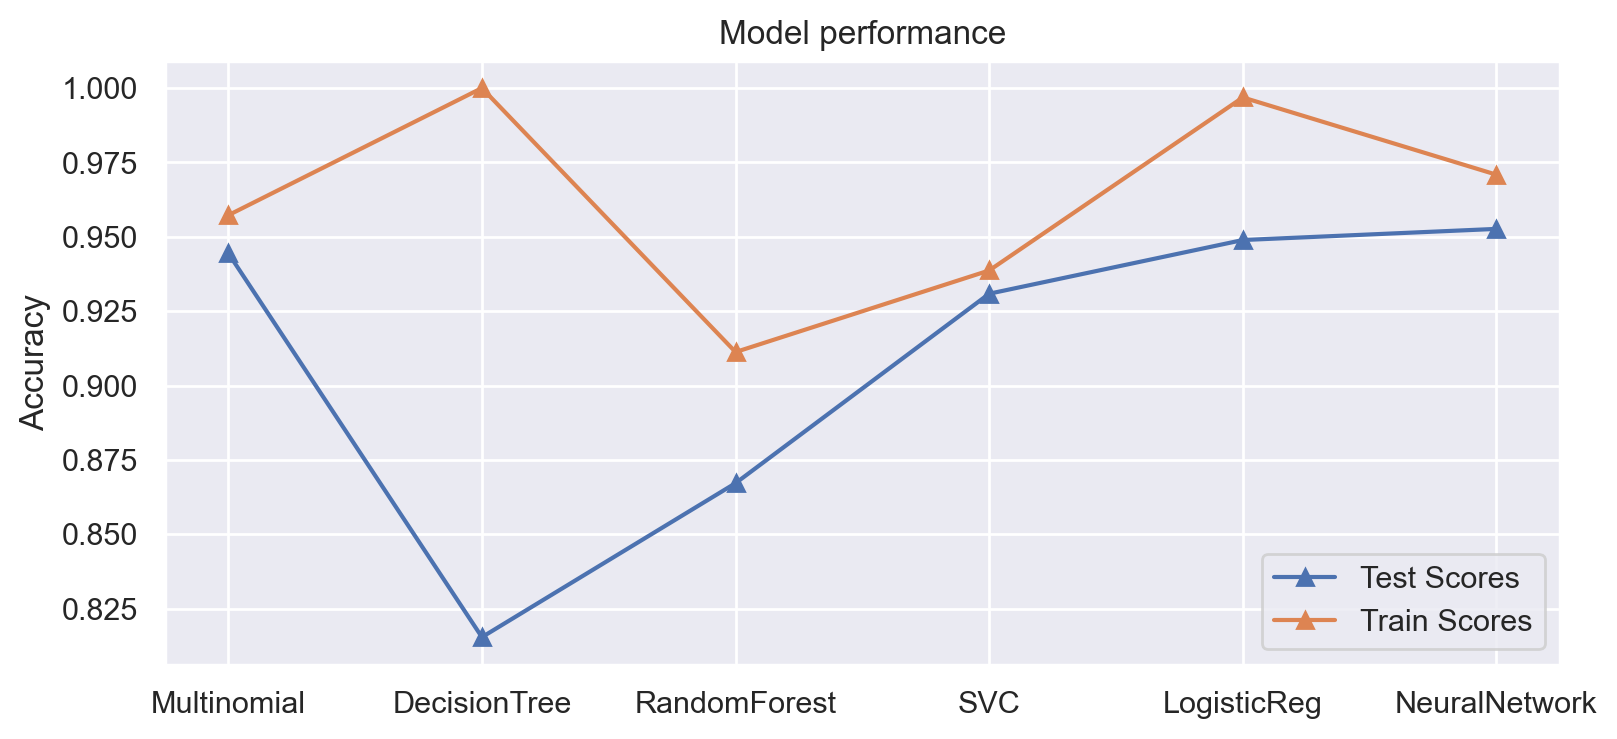

In [47]:
plt.figure(figsize=(9, 4), dpi=200)
plt.plot(Models, scores_test, marker='^', label='Test Scores')
plt.plot(Models, scores_train, marker='^', label='Train Scores')
plt.ylabel('Accuracy')
plt.title('Model performance')
plt.legend()

Text(0.5, 1.0, 'Model training times')

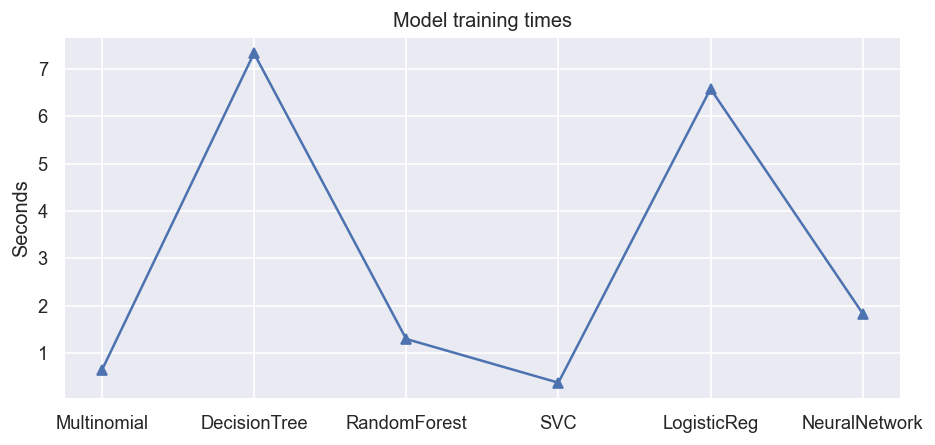

In [48]:
plt.figure(figsize=(9, 4), dpi=120)
plt.plot(Models, train_time, marker='^')
plt.ylabel('Seconds')
plt.title('Model training times')

Again, neural network performed the best, followed closely by the logistic regression. However, for this data set naive bayes model performed much better relative to the other models and it improved it's own accuracy over MCF7 data set.

Generally, most of the classifiers performed worse on this data set than the previous, with worst by far being decision tree and random forest.

# DropSeq/HCC1806 - All Data
Same as before, time for the full data set.

In [49]:
X_train = (df_Mshuffled.to_numpy()).T
Y_train = []
for i in range(len(df_Mshuffled.columns)):
    if 'Hypo' in df_Mshuffled.columns[i]:
        Y_train.append(1)
    else:
        Y_train.append(0)
Y_train=np.array(Y_train)

In [50]:
#Neural Network
X_validation=X_train[:1000]
Y_validation=Y_train[:1000]
X_partial_train=X_train[1000:]
Y_partial_train=Y_train[1000:]
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(3000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
model.fit(X_partial_train,Y_partial_train,epochs=4,batch_size=512,validation_data=(X_validation, Y_validation))
end = time.time()

print("Training time: ", end - start, "seconds")
print("Accuracy on test data: ", model.evaluate(X_train, Y_train)[1])

Epoch 1/4
27/27 [==============================] - 1s 21ms/step - loss: 0.4605 - accuracy: 0.8332 - val_loss: 0.2994 - val_accuracy: 0.9320
Epoch 2/4
27/27 [==============================] - 0s 15ms/step - loss: 0.2275 - accuracy: 0.9483 - val_loss: 0.1865 - val_accuracy: 0.9410
Epoch 3/4
27/27 [==============================] - 0s 17ms/step - loss: 0.1440 - accuracy: 0.9605 - val_loss: 0.1333 - val_accuracy: 0.9530
Epoch 4/4
27/27 [==============================] - 0s 14ms/step - loss: 0.1060 - accuracy: 0.9660 - val_loss: 0.1161 - val_accuracy: 0.9510
Training time:  2.6271109580993652 seconds
459/459 [==============================] - 1s 2ms/step - loss: 0.0885 - accuracy: 0.9726
Accuracy on test data:  0.9725514054298401


In [51]:
test_data=pd.read_csv("DropSeq/HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter="\ ",engine='python',index_col=0)

In [52]:
test=test_data.to_numpy().T
predictionHCC1806_Drop = model.predict(test)

115/115 [==============================] - 0s 2ms/step


In [53]:
predictionHCC1806_Drop_Str=[]
for i in range(len(predictionHCC1806_Drop)):
    if predictionHCC1806_Drop[i]>=0.5:
        predictionHCC1806_Drop[i]=1
        predictionHCC1806_Drop_Str.append('Hypo')
    else:
        predictionHCC1806_Drop[i]=0
        predictionHCC1806_Drop_Str.append('Norm')

In [54]:
#textfile = open("HCC1806rop.txt", "w")
#for x in predictionHCC1806_Drop:
#    textfile.write(str(x) + "\t")
#textfile.close()

# SmartSeq/MCF7
Similar process as before, just different type of data set. We can see that this data set has much smaller sample size, therefore a different approach is required for classification. Because of the small sample size, we use simpler models. As a consequence, here neural network is excluded.

Also due to small amount of data, and to reduce repetitiveness, we don't split samples. We train models on full data set, and then predict unlabeled data.

In [55]:
df_M=pd.read_csv("SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)

In [56]:
X_train = (df_M.to_numpy()).T
Y_train = []
for i in range(len(df_M.columns)):
    if 'Hypo' in df_M.columns[i]:
        Y_train.append(1)
    else:
        Y_train.append(0)
Y_train=np.array(Y_train)

In [57]:
Models = []
scores_train = []
train_time = []
#Naive bayes multinomial
start = time.time()

Multinomial_Model = MultinomialNB().fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")
print("Accuracy on train data: ", Multinomial_Model.score(X_train, Y_train))

train_time.append(end - start)
Models.append('Multinomial')
scores_train.append(Multinomial_Model.score(X_train, Y_train))

Training time:  0.006140947341918945 seconds
Accuracy on train data:  1.0


In [58]:
#Decision tree
start = time.time()
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")
print("Accuracy on train data: ", DecisionTree.score(X_train, Y_train))
train_time.append(end - start)
Models.append('DecisionTree')
scores_train.append(DecisionTree.score(X_train, Y_train))

Training time:  0.07354402542114258 seconds
Accuracy on train data:  1.0


In [59]:
#Random forest
start = time.time()
RandomForest = RandomForestClassifier(n_estimators=25, max_depth=10)
RandomForest.fit(X_train, Y_train)
end = time.time()
print("Training time: ", end - start, "seconds")
print("Accuracy on train data: ", RandomForest.score(X_train, Y_train))

train_time.append(end - start)
Models.append('RandomForest')
scores_train.append(RandomForest.score(X_train, Y_train))

Training time:  0.10258603096008301 seconds
Accuracy on train data:  1.0


In [60]:
#SVM
start = time.time()
SVC = LinearSVC(C=0.0001)
SVC.fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")

print("Accuracy on train data: ", SVC.score(X_train, Y_train))

train_time.append(end - start)
Models.append('SVC')
scores_train.append(SVC.score(X_train, Y_train))


Training time:  0.041712284088134766 seconds
Accuracy on train data:  1.0


In [61]:
#Logistic regression
start = time.time()

Logistic_Regression=LogisticRegression(max_iter=1000)
Logistic_Regression.fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")

print("Accuracy on train data: ", Logistic_Regression.score(X_train, Y_train))
train_time.append(end - start)
Models.append('LogisticReg')
scores_train.append(Logistic_Regression.score(X_train, Y_train))

Training time:  0.08416223526000977 seconds
Accuracy on train data:  1.0


In [62]:
#Neural network
X_validation=X_train[:30]
Y_validation=Y_train[:30]

X_partial_train=X_train[30:]
Y_partial_train=Y_train[30:]

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(3000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

start = time.time()
model.fit(X_partial_train,Y_partial_train,epochs=4,batch_size=512,validation_data=(X_validation, Y_validation))
end = time.time()

print("Training time: ", end - start, "seconds")
print("Accuracy on train data: ", model.evaluate(X_train, Y_train)[1])

train_time.append(end - start)
Models.append('NeuralNetwork')
scores_train.append(model.evaluate(X_train,Y_train)[1])


Epoch 1/4
1/1 [==============================] - 1s 1s/step - loss: 63.2992 - accuracy: 0.5591 - val_loss: 0.3907 - val_accuracy: 0.9667
Epoch 2/4
1/1 [==============================] - 0s 42ms/step - loss: 3.4721 - accuracy: 0.9636 - val_loss: 9.8913 - val_accuracy: 0.9000
Epoch 3/4
1/1 [==============================] - 0s 43ms/step - loss: 11.9882 - accuracy: 0.9364 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/4
1/1 [==============================] - 0s 42ms/step - loss: 2.5963 - accuracy: 0.9727 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Training time:  1.2300779819488525 seconds
8/8 [==============================] - 0s 2ms/step - loss: 2.0889e-20 - accuracy: 1.0000
Accuracy on train data:  1.0
8/8 [==============================] - 0s 2ms/step - loss: 2.0889e-20 - accuracy: 1.0000


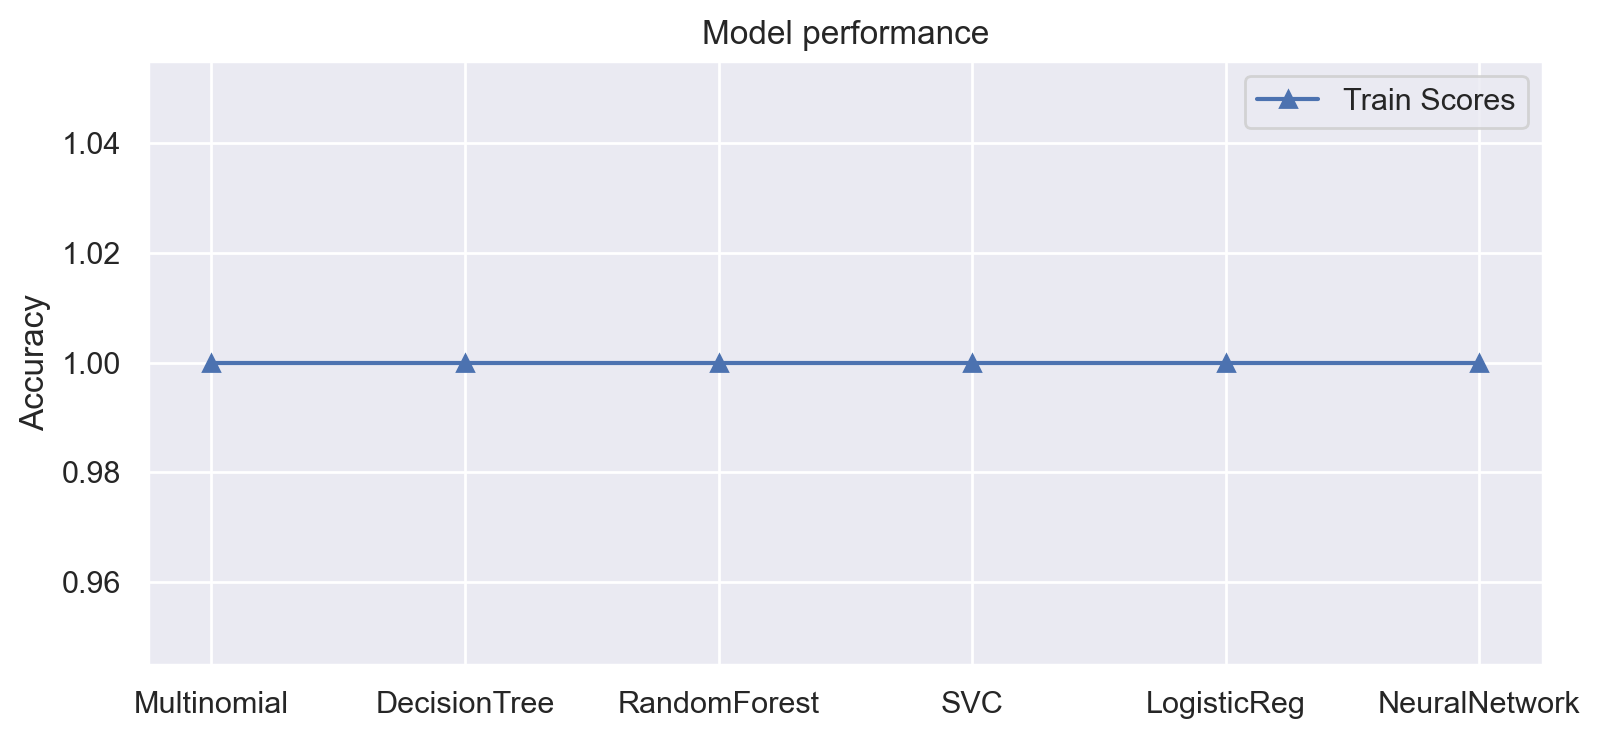

In [63]:
plt.figure(figsize=(9, 4), dpi=200)
plt.plot(Models, scores_train, marker='^', label='Train Scores')
plt.ylabel('Accuracy')
plt.title('Model performance')
plt.legend()

Text(0.5, 1.0, 'Model training times')

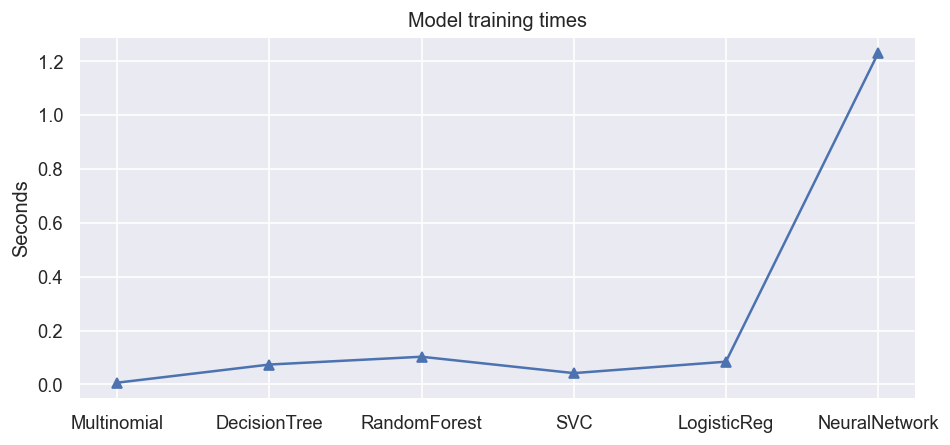

In [64]:
plt.figure(figsize=(9, 4), dpi=120)
plt.plot(Models, train_time, marker='^')
plt.ylabel('Seconds')
plt.title('Model training times')


In [65]:
test_data=pd.read_csv("SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter="\ ",engine='python',index_col=0)

In [66]:
test=test_data.to_numpy().T
predictionMCF7_Smart = SVC.predict(test)

In [67]:
predictionMCF7_Smart_Str=[]
for x in predictionMCF7_Smart:
    if x==1:
        predictionMCF7_Smart_Str.append('Hypo')
    else:
        predictionMCF7_Smart_Str.append('Norm')

In [68]:
predictionMCF7_Smart.mean()

0.49206349206349204

In [69]:
#textfile = open("MCF7Smart.txt", "w")
#for x in predictionMCF7_Smart:
#    textfile.write(str(x) + "\t")
#textfile.close()

# SmartSeq/HCC1806

In [70]:
df_M=pd.read_csv("SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)

In [71]:
X_train = (df_M.to_numpy()).T
Y_train = []
for i in range(len(df_M.columns)):
    if 'Hypo' in df_M.columns[i]:
        Y_train.append(1)
    else:
        Y_train.append(0)
Y_train=np.array(Y_train)

In [72]:
Models = []
scores_train = []
train_time = []
#Multinomial

start = time.time()

Multinomial_Model = MultinomialNB().fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")

print("Accuracy on train data: ", Multinomial_Model.score(X_train, Y_train))
train_time.append(end - start)
Models.append('Multinomial')
scores_train.append(Multinomial_Model.score(X_train, Y_train))

Training time:  0.00461268424987793 seconds
Accuracy on train data:  0.989010989010989


In [73]:
#Decision tree
start = time.time()

DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")

print("Accuracy on train data: ", DecisionTree.score(X_train, Y_train))

train_time.append(end - start)
Models.append('DecisionTree')
scores_train.append(DecisionTree.score(X_train, Y_train))

Training time:  0.06746530532836914 seconds
Accuracy on train data:  1.0


In [74]:
#Random forest
start = time.time()

RandomForest = RandomForestClassifier(n_estimators=25, max_depth=10)
RandomForest.fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")

print("Accuracy on train data: ", RandomForest.score(X_train, Y_train))

train_time.append(end - start)
Models.append('RandomForest')
scores_train.append(RandomForest.score(X_train, Y_train))

Training time:  0.09046602249145508 seconds
Accuracy on train data:  1.0


In [75]:
#SVM
start = time.time()

SVC = LinearSVC(C=0.0001)
SVC.fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")

print("Accuracy on train data: ", SVC.score(X_train, Y_train))

train_time.append(end - start)
Models.append('SVC')
scores_train.append(SVC.score(X_train, Y_train))

Training time:  0.07026886940002441 seconds
Accuracy on train data:  1.0


In [76]:
#logistic regression
start = time.time()

Logistic_Regression=LogisticRegression(max_iter=1000)
Logistic_Regression.fit(X_train, Y_train)

end = time.time()
print("Training time: ", end - start, "seconds")

print("Accuracy on train data: ", Logistic_Regression.score(X_train, Y_train))

train_time.append(end - start)
Models.append('LogisticReg')
scores_train.append(Logistic_Regression.score(X_train, Y_train))

Training time:  0.11328530311584473 seconds
Accuracy on train data:  1.0


In [77]:
#neural network
X_validation=X_train[:30]
Y_validation=Y_train[:30]

X_partial_train=X_train[30:]
Y_partial_train=Y_train[30:]

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(3000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

start = time.time()
model.fit(X_partial_train,Y_partial_train,epochs=4,batch_size=512,validation_data=(X_validation, Y_validation))
end = time.time()

print("Training time: ", end - start, "seconds")
print("Accuracy on test data: ", model.evaluate(X_train, Y_train)[1])

train_time.append(end - start)
Models.append('NeuralNetwork')
scores_train.append(model.evaluate(X_train,Y_train)[1])

Epoch 1/4
1/1 [==============================] - 1s 903ms/step - loss: 1267.4927 - accuracy: 0.4737 - val_loss: 174.3838 - val_accuracy: 0.4000
Epoch 2/4
1/1 [==============================] - 0s 36ms/step - loss: 282.9292 - accuracy: 0.4342 - val_loss: 311.3988 - val_accuracy: 0.5333
Epoch 3/4
1/1 [==============================] - 0s 38ms/step - loss: 332.7450 - accuracy: 0.5000 - val_loss: 92.4666 - val_accuracy: 0.6000
Epoch 4/4
1/1 [==============================] - 0s 35ms/step - loss: 127.7349 - accuracy: 0.5461 - val_loss: 76.6993 - val_accuracy: 0.7333
Training time:  1.0978100299835205 seconds
6/6 [==============================] - 0s 3ms/step - loss: 73.8865 - accuracy: 0.6703
Accuracy on test data:  0.6703296899795532
6/6 [==============================] - 0s 2ms/step - loss: 73.8865 - accuracy: 0.6703


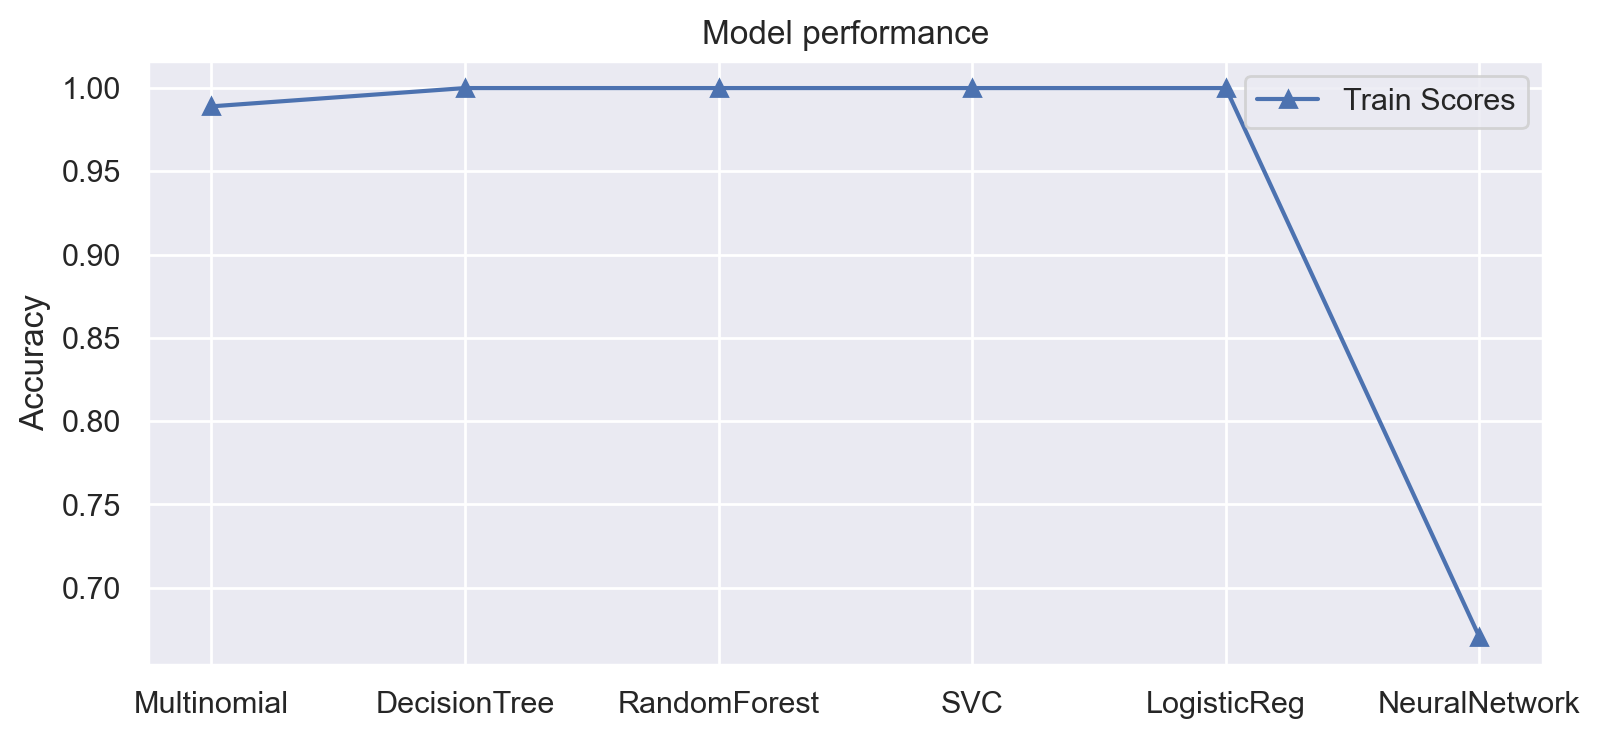

In [78]:
plt.figure(figsize=(9, 4), dpi=200)
plt.plot(Models, scores_train, marker='^', label='Train Scores')
plt.ylabel('Accuracy')
plt.title('Model performance')
plt.legend()


Text(0.5, 1.0, 'Model training times')

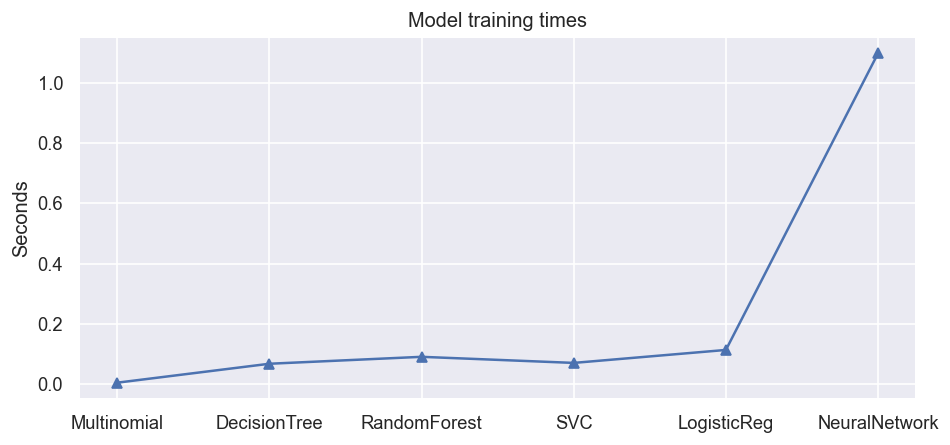

In [79]:
plt.figure(figsize=(9, 4), dpi=120)
plt.plot(Models, train_time, marker='^')
plt.ylabel('Seconds')
plt.title('Model training times')

In [80]:
test_data=pd.read_csv("SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt",delimiter="\ ",engine='python',index_col=0)

In [81]:
test=test_data.to_numpy().T
predictionHCC1806_Smart = SVC.predict(test)

In [82]:

predictionHCC1806_Smart_Str=[]
for x in predictionHCC1806_Smart:
    if x==1:
        predictionHCC1806_Smart_Str.append('Hypo')
    else:
        predictionHCC1806_Smart_Str.append('Norm')

In [83]:
predictionHCC1806_Smart.mean()

0.4666666666666667

In [84]:
#textfile = open("HCC1806Smart.txt", "w")
#for x in predictionHCC1806_Smart:
#    textfile.write(str(x) + "\t")
#textfile.close()